# Introdução

Depois de um primeiro triênio cujo maior desafio foi estabelecer o conceito de Empresa Júnior como se entende hoje e um segundo triênio dedicado a melhorar os processos de gestão das EJs, Ianna Brandão, Diretora de Desenvolvimento em 2016, deu início ao terceiro triênio da estratégia em rede idealizada ainda em 2009 <strong data-cite="feldhaus2012gestao">(Calegari, 2012)</strong> criando o mote "Mais e Melhores Projetos". A clareza e o foco que os conceitos por ela criados trouxeram, como a definição única de "projeto" e uma plataforma integrada para auditoria (ideia mãe do Portal BJ), foram em grande parte responsáveis por gerar, em pouco mais de 2 anos, tanto resultado quanto se havia gerado nos 27 anos anteriores do Movimento Empresa Júnior.

A nova riqueza e complexidade que abarcou o MEJ fez as antigas estratégias de suporte da Brasil Júnior e das Federações se tornarem insuficientes. Como prestariam às Empresas Juniores o tão necessário direcionamento num contexto tão diverso? Este foi o problema motivador da criação do Sistema de Clusters ainda em 2016 <strong data-cite="clusters2017">(Leite, 2017)</strong> que trouxe como solução a separação das EJs em grupos, ou *clusters*, de acordo com as dores que estas comumente sentem ao longo dos seus estágios de amadurecimento.

Em 2019, após a recriação da estratégia compartilhada da rede através do projeto "Futuro do MEJ", tornou-se necessário reconstruir os fundamentos da clusterização. Este processo culminou no atual entendimento do conceito de cluster e das dores associadas a cada um deles. Uma descrição mais detalhada destes tópicos pode ser encontrada [neste link](bit.ly/CLUSTERS) <strong data-cite="clusters2019">(Bezerra, 2019)</strong>.

Abaixo, busca-se analisar os dados gerados a partir do formulário de diagnóstico das Empresas Juniores inscritas no Programa de Suporte da SERJÚNIOR em 2020 idealizado sob a ótica deste Sistema de Clusters. Além de tentar entender quão bem este framework descreve e diferencia a rede sergipana, almeja-se extrair insigths práticos capazes de melhor direcionar as táticas locais de suporte.

# Análise

## Considerações Iniciais

Todos os dados e arquivos utilizados, incluindo a versão editável deste documento, podem ser encontrados [neste repositório](https://github.com/gustavomello9600/clusters).

**Ao leitor não técnico, recomenda-se que se leia de forma superficial as etapas de Tratamento e Modelagem e que se dê especial ênfase à etapa de Discussão. Nas seções de código, é suficiente ler apenas as linhas que se iniciam com "#".**

Ao longo do texto, buscou-se esclarecer em linguagem simples e natural, até onde viável, o significado dos conceitos abordados e do código empregado. Foram levados em conta, ainda, os procedimentos necessários para garantir a reprodutibilidade da análise.

Todas as ferramentas utilizadas são provenientes de bibliotecas gratuitas das linguagens de programação R e Python.

Para melhorar a precisão dos métodos empregados, a escala das respostas foi alterada: saiu de 1 até 5 no formulário para 0 até 4 na análise.

## Tratamento

As linhas de código abaixo servem para garantir que, em qualquer sistema operacional, o programa consiga alcançar os dados.

In [1]:
#Traz as ferramentas que o Python precisa para se mover dentre
#as pastas do sistema operacional em que está sendo executado
import os

#Ensina o Python a encontrar os dados do diagnóstico
caminho_para_os_dados =  os.path.join("dados",
                                      "clusters.csv")

#Carrega a integração entre as linguagens R e Python
%load_ext rpy2.ipython

Para facilitar a análise, os dados são formatados em tabelas no padrão **tidy**, isto é, que contém apenas uma variável por coluna e apenas uma observação por linha. As tabelas são salvas em formato CSV na pasta "resultados" e podem ser trabalhadas via Google Planilhas ou Excel. 

In [2]:
%%R -i caminho_para_os_dados
#Chama a linguagem R e fornece o caminho para os dados do diagnóstico

#Carrega, silenciosamente, as ferramentas de análise
suppressMessages(library(tidyverse))

#Lê os dados e os formata para análise
entrada <- read.csv(caminho_para_os_dados)
entrada <- as_tibble(entrada)

#Processa e organiza os dados carregados 
processada <- entrada %>%
                  pivot_longer(
                       cols = -EJs,
                       names_to = c("Eixo", "Cluster", "Dores"),
                       names_pattern = "([A-Z]+)_([1-5])_([1-5])",
                       values_to = "Resposta")
    
#Agrupa os dados por EJ, Cluster e Eixo e calcula a média das
#respostas para cada um desses grupos
empresas_juniores <- processada %>%
                         group_by(EJs, Cluster, Eixo) %>%
                         summarise(Media=mean(Resposta))

#Gera uma base de dados para cada Eixo
ejs_por_MN <- empresas_juniores %>% filter(Eixo == "MN")
ejs_por_VM <- empresas_juniores %>% filter(Eixo == "VM")
ejs_por_TC <- empresas_juniores %>% filter(Eixo == "TC")
ejs_por_GO <- empresas_juniores %>% filter(Eixo == "GO")


#Agrupa os dados por EJ e Cluster e calcula a
#média das respostas para cada um desses grupos
ejs_por_cluster <- empresas_juniores %>%
                       group_by(EJs, Cluster) %>%
                       summarise(Media=mean(Media))

#Agrupa os dados por EJ e Eixo e calcula a
#média das respostas para cada um desses grupos
ejs_por_eixo <- empresas_juniores %>%
                    group_by(EJs, Eixo) %>%
                    summarize(Media=mean(Media))
        
#Agrupa os dados por Cluster, Eixo e Dores,
#calcula a média para cada grupo e organiza a tabela
#de modo que as dores mais presentes fiquem no topo
dores <- processada %>%
             group_by(Cluster, Eixo, Dores) %>%
             summarise(Media=mean(Resposta)) %>%
             arrange(desc(Media))

#Sumariza as dores por eixo
eixos <- dores %>%
             group_by(Eixo) %>%
             summarize(Media=mean(Media)) %>%
             arrange(desc(Media))
            
#Escreve as tabelas nos arquivos correspondentes
#dentro da pasta "resultados"
setwd("resultado")
write.csv(entrada, "entrada.csv", row.names = FALSE)
write.csv(processada, "processada.csv", row.names = FALSE)
write.csv(empresas_juniores, "empresas_juniores.csv", row.names = FALSE)
write.csv(ejs_por_MN, "ejs_por_MN.csv", row.names = FALSE)
write.csv(ejs_por_VM, "ejs_por_VM.csv", row.names = FALSE)
write.csv(ejs_por_TC, "ejs_por_TC.csv", row.names = FALSE)
write.csv(ejs_por_GO, "ejs_por_GO.csv", row.names = FALSE)
write.csv(ejs_por_cluster, "ejs_por_cluster.csv", row.names = FALSE)
write.csv(ejs_por_eixo, "ejs_por_eixo.csv", row.names = FALSE)
write.csv(dores, "dores.csv", row.names = FALSE)
write.csv(eixos, "eixos.csv", row.names = FALSE)
setwd("..")

#Mostra as primeiras linhas da tabela de dores
print(head(dores))

#Mostra o sumário por eixo
eixos

`summarise()` regrouping output by 'EJs', 'Cluster' (override with `.groups` argument)
`summarise()` regrouping output by 'EJs' (override with `.groups` argument)
`summarise()` regrouping output by 'EJs' (override with `.groups` argument)
`summarise()` regrouping output by 'Cluster', 'Eixo' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
# A tibble: 6 x 4
# Groups:   Cluster, Eixo [5]
  Cluster Eixo  Dores Media
  <chr>   <chr> <chr> <dbl>
1 5       VM    2      2.83
2 5       VM    1      2.5 
3 2       TC    1      2.42
4 3       TC    2      2.42
5 1       TC    1      2.33
6 4       VM    1      2.33
# A tibble: 4 x 2
  Eixo  Media
  <chr> <dbl>
1 VM     2   
2 TC     1.77
3 MN     1.57
4 GO     1.52


O que a primeira tabela nos diz em sua primeira linha, por exemplo, é que a dor mais latente das EJs inscritas no programa de suporte, de acordo com suas respostas ao formulário de diagnóstico, é a dor 2 do eixo de Vendas & Mercado no Cluster 5. Consultando-la, vemos que corresponde a:

> Temos dificuldade de encontrar nichos de mercado alternativos para serem explorados e posicionar nossa marca em canais que os atinjam.

\noindent
As demais dores, em ordem de colocação, são:

> Não realizamos investimentos em estruturas que tornem nosso processo de vendas mais inteligente e automatizado.

> O engajamento dos nossos membros é muito desproporcional, o que gera picos de produtividade e inconstância de resultados.

> Nossos membros são pouco proativos em empreenderem mudanças importantes para a nossa EJ.

> Temos dificuldade em atrair membros para a EJ.

> Não temos uma inteligência de vendas para tornar a prospecção de novos negócios e vendas mais eficiente.

Já a segunda tabela mostra que a maioria das dores estão concentradas nos eixos de **Vendas & Mercado** e **Time & Cultura**.

## Modelagem
A modelagem é a etapa em que se buscam padrões dentro dos dados. Duas técnicas são aqui empregadas: A Análise de Componentes Principais, ou PCA, e a Análise Fatorial.

### Análise de Componentes Principais

Consiste em encontrar em um grupo de dados os eixos onde há mais variação. Para os fins desta análise, considera-se que o padrão de identificação geral de uma EJ com as dores de cada cluster pode ser representada como um sinal, isto é, como na Figura 1.

![EJs](output_9_1.png)

A EJ hipotética representada em azul tem um "Sinal de Cluster" mais forte no 1 e no 4. Na prática, isto significa que a maior parte das suas dores estão no cluster 1, uma menor parte no 4 e nenhuma nas demais. Repare que as EJs em verde e vermelho, representadas por traços pontilhados, tem perfis próximos. 

É notável ao olho humano que o sinal verde é mais próximo ao azul do que o vermelho o é. A Análise de Componentes Principais, ou PCA, como comumente é referida, enxerga, no entanto, os dois sinais como distantes do azul na mesma medida. Para contornar este problema, basta "espalhar" um pouco o sinal de cada EJ. Isto pode ser feito através de uma operação conhecida na Álgebra Linear como "mudança de base". O resultado de um sinal puro e unitário de cluster 1 ao ser "espalhado" é o que pode ser visto na Figura 2.

![Sinal Espalhado](output_8_1.png)

O sinal azul é o original e o sinal amarelo é a sua versão distribuída. Distribuí-lo ajuda a conferir um peso maior para sua relação com cada cluster adjacente, isto é, ensina o método que uma EJ de cluster 4 é mais próxima de uma EJ de cluster 5 do que de uma EJ de cluster 1.

Cada sinal pode ser então entendido como um vetor de 5 dimensões, cada dimensão representando a força do sinal em cada cluster. A utilidade de interpretar os dados como sinais é que sinais, quando representados por vetores, conseguem tangibilizar a noção de distância ou diferença na forma de cálculos matemáticos.

As próximas linhas de código tem por objetivo ensinar o Python a trabalhar os sinais de cluster e são necessárias para a PCA. O leitor não técnico pode pulá-las sem prejuízo de entendimento.

In [3]:
#Traz uma ferramenta de cálculo numérico para o Python
import numpy as np

#Permite que o Python consiga verificar se uma dada
#variável é ou não um número
from numbers import Number

#Carrega um método de inversão de matrizes
from numpy.linalg import inv as inversa


#Dá forma ao conceito de Sinal de Cluster dentro do Pythom
class Sinal_de_Cluster:
    
    #Introduz a base canônica, isto é, aquela onde os sinais
    #estão em sua forma original ou não espalhada
    bases = {"c": ((1, 0, 0, 0, 0),
                   (0, 1, 0, 0, 0),
                   (0, 0, 1, 0, 0),
                   (0, 0, 0, 1, 0),
                   (0, 0, 0, 0, 1))}
    
    #Ensina o Python a definir uma nova base
    @classmethod
    def definir_base(cls, símbolo, matriz, normal=True):
        if not normal:
            cls.bases[símbolo] = matriz
        else:
            vetores_da_base    = [[coord[i] for coord in matriz]
                                   for i in range(len(matriz[0]))]
            sinais_da_base     = [Sinal_de_Cluster(vetor)
                                  for vetor in vetores_da_base]
            base_normalizada   = [sinal/abs(sinal)
                                  for sinal in sinais_da_base]
            cls.bases[símbolo] = [
                
                [base[i] for base in base_normalizada]
                 for i in range(len(base_normalizada[0]))]
            
    #Ensina o Python a construir um Sinal de Cluster
    def __init__(self, vetor, base="c", name=None):
        self.base        = base
        self.coordenadas = [coord for coord in vetor]
        self.pontos      = [0] + self.coordenadas + [0]
        self.T           = [[coord] for coord in vetor]
        if name is None:
            self.name    = "Sem Nome"
        else:
            self.name    = name
        
    #Ensina o Python a calcular um produto interno     
    def interno(self, other):
        resultado = 0
        
        for i in range (7):
            k     = 1
            if i == 0 or i == 6:
                k = 0.5
            resultado += k * self.pontos[i] * other.pontos[i]
            
        return resultado
    
    #Ensina o Python a normalizar um sinal, isto é, reduzí-lo a
    #uma versão que esteja a uma unidade de distância da origem,
    #ou seja, do sinal nulo
    def normalizado(self):
        
        return self/(abs(self))
    
    #Todas as definições a seguir servem para ensinar o Python a operar
    #os sinais, isto é, realizar somas, subtrações, multiplicações
    #e divisões entre eles.
    
    def __add__(self, other):
        vetor = [self.coordenadas[i]
                 + other.coordenadas[i]
                 for i in range(5)]
        
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __radd__(self, other):
        if other == 0: return self
    
    def __sub__(self, other):
        vetor = [self.coordenadas[i]
                 - other.coordenadas[i]
                 for i in range(5)]
        
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __mul__(self, other):
        if isinstance(other, Sinal_de_Cluster):
            return self.interno(other)
        elif isinstance(other, Number):
            return other*self
        else:
            raise NotImplementedError
            
    def __truediv__(self, other):
        if isinstance(other, Number):
            return self * (1/other)
    
    def __rmul__(self, other):
        if isinstance(other, Number):
            vetor = [other * coord for
                     coord in self.coordenadas]
            return Sinal_de_Cluster(vetor, base=self.base)
        else:
            raise NotImplementedError
    
    #Ensina o Python a calcular o módulo de um sinal, isto é,
    #sua distância à origem (sinal nulo)
    def __abs__(self):
        return float((self * self) ** (1/2))
    
    #Ensina o Python a calcular o número de dimensões de um sinal
    def __len__(self):
        return len(self.coordenadas)
    
    #Ensina o Python a ver as coordenadas do vetor que representa
    #o sinal
    def __getitem__(self, i):
        return self.coordenadas[i]
    
    #Ensina o Python a mudar um vetor de base
    def para_a_base(self, base):
        if base == self.base:
            return self
        else:
            atual_para_c = Sinal_de_Cluster.bases[self.base]
            c_para_base  = inversa(
                               np.array(Sinal_de_Cluster.bases[base]))
            
            array        = c_para_base @ atual_para_c @ np.array(self.T)
            
            return       Sinal_de_Cluster([n[0] for n in array],
                                          base=base, name=self.name)
        
    #As definições abaixo ensinam o Python a representar um vetor
    #de forma entendível por pessoas
    def __repr__(self):
        return self.name + ":\n" + np.array(self.T).__repr__(
               ) + "\nbase {}".format(self.base)
    
    def __str__(self):
        return self.name + ":" + np.array(self.T).__str__(
               ) + " base {}".format(self.base)
    

#Ensina como distribuir cada sinal unitário
matriz_da_base_C = (
    
    (8, 4, 2, 1, 1),
    (4, 8, 4, 2, 1),
    (2, 4, 8, 4, 2),
    (1, 2, 4, 8, 4),
    (1, 1, 2, 4, 8))

#Define a base onde os sinais se encontram distribuídos
Sinal_de_Cluster.definir_base("C", matriz_da_base_C)

O próximo passo é processar os dados de cada EJ como sinais:

In [4]:
#Traz uma ferramenta de análise de dados tabelados para o Python
import pandas as pd

#Recupera as tabelas com os dados previamente processados pelo R
%R -o ejs_por_cluster 

#Recupera o nome de cada EJ
EJs = pd.unique(ejs_por_cluster["EJs"])

#Cria uma lista vazia para adicionar os sinais
sinais = []

#Para cada EJ dentre todas as EJs
for EJ in EJs:
    
    #Extrai as linhas da tabela que tratam da EJ
    linhas_da_EJ = ejs_por_cluster[ejs_por_cluster["EJs"] == EJ]
    
    #Cria uma lista vazia para preencher com o seu sinal
    sinal = []
    
    #Para cada linha dentre todas as linhas
    for índice, linha in linhas_da_EJ.iterrows():
        
        #Adiciona o valor do sinal de cada cluster
        sinal.append(linha["Media"])
        
    #Adiciona o sinal à lista de sinais identificando a EJ
    sinais.append((EJ, sinal))

#Processa os sinais para que seja possível trabalhar com eles
sinais_das_EJs = [Sinal_de_Cluster(sinal, base="C", name=EJ).para_a_base("c")
                  for EJ, sinal in sinais]

Enxergando os sinais das 3 primeiras EJs:

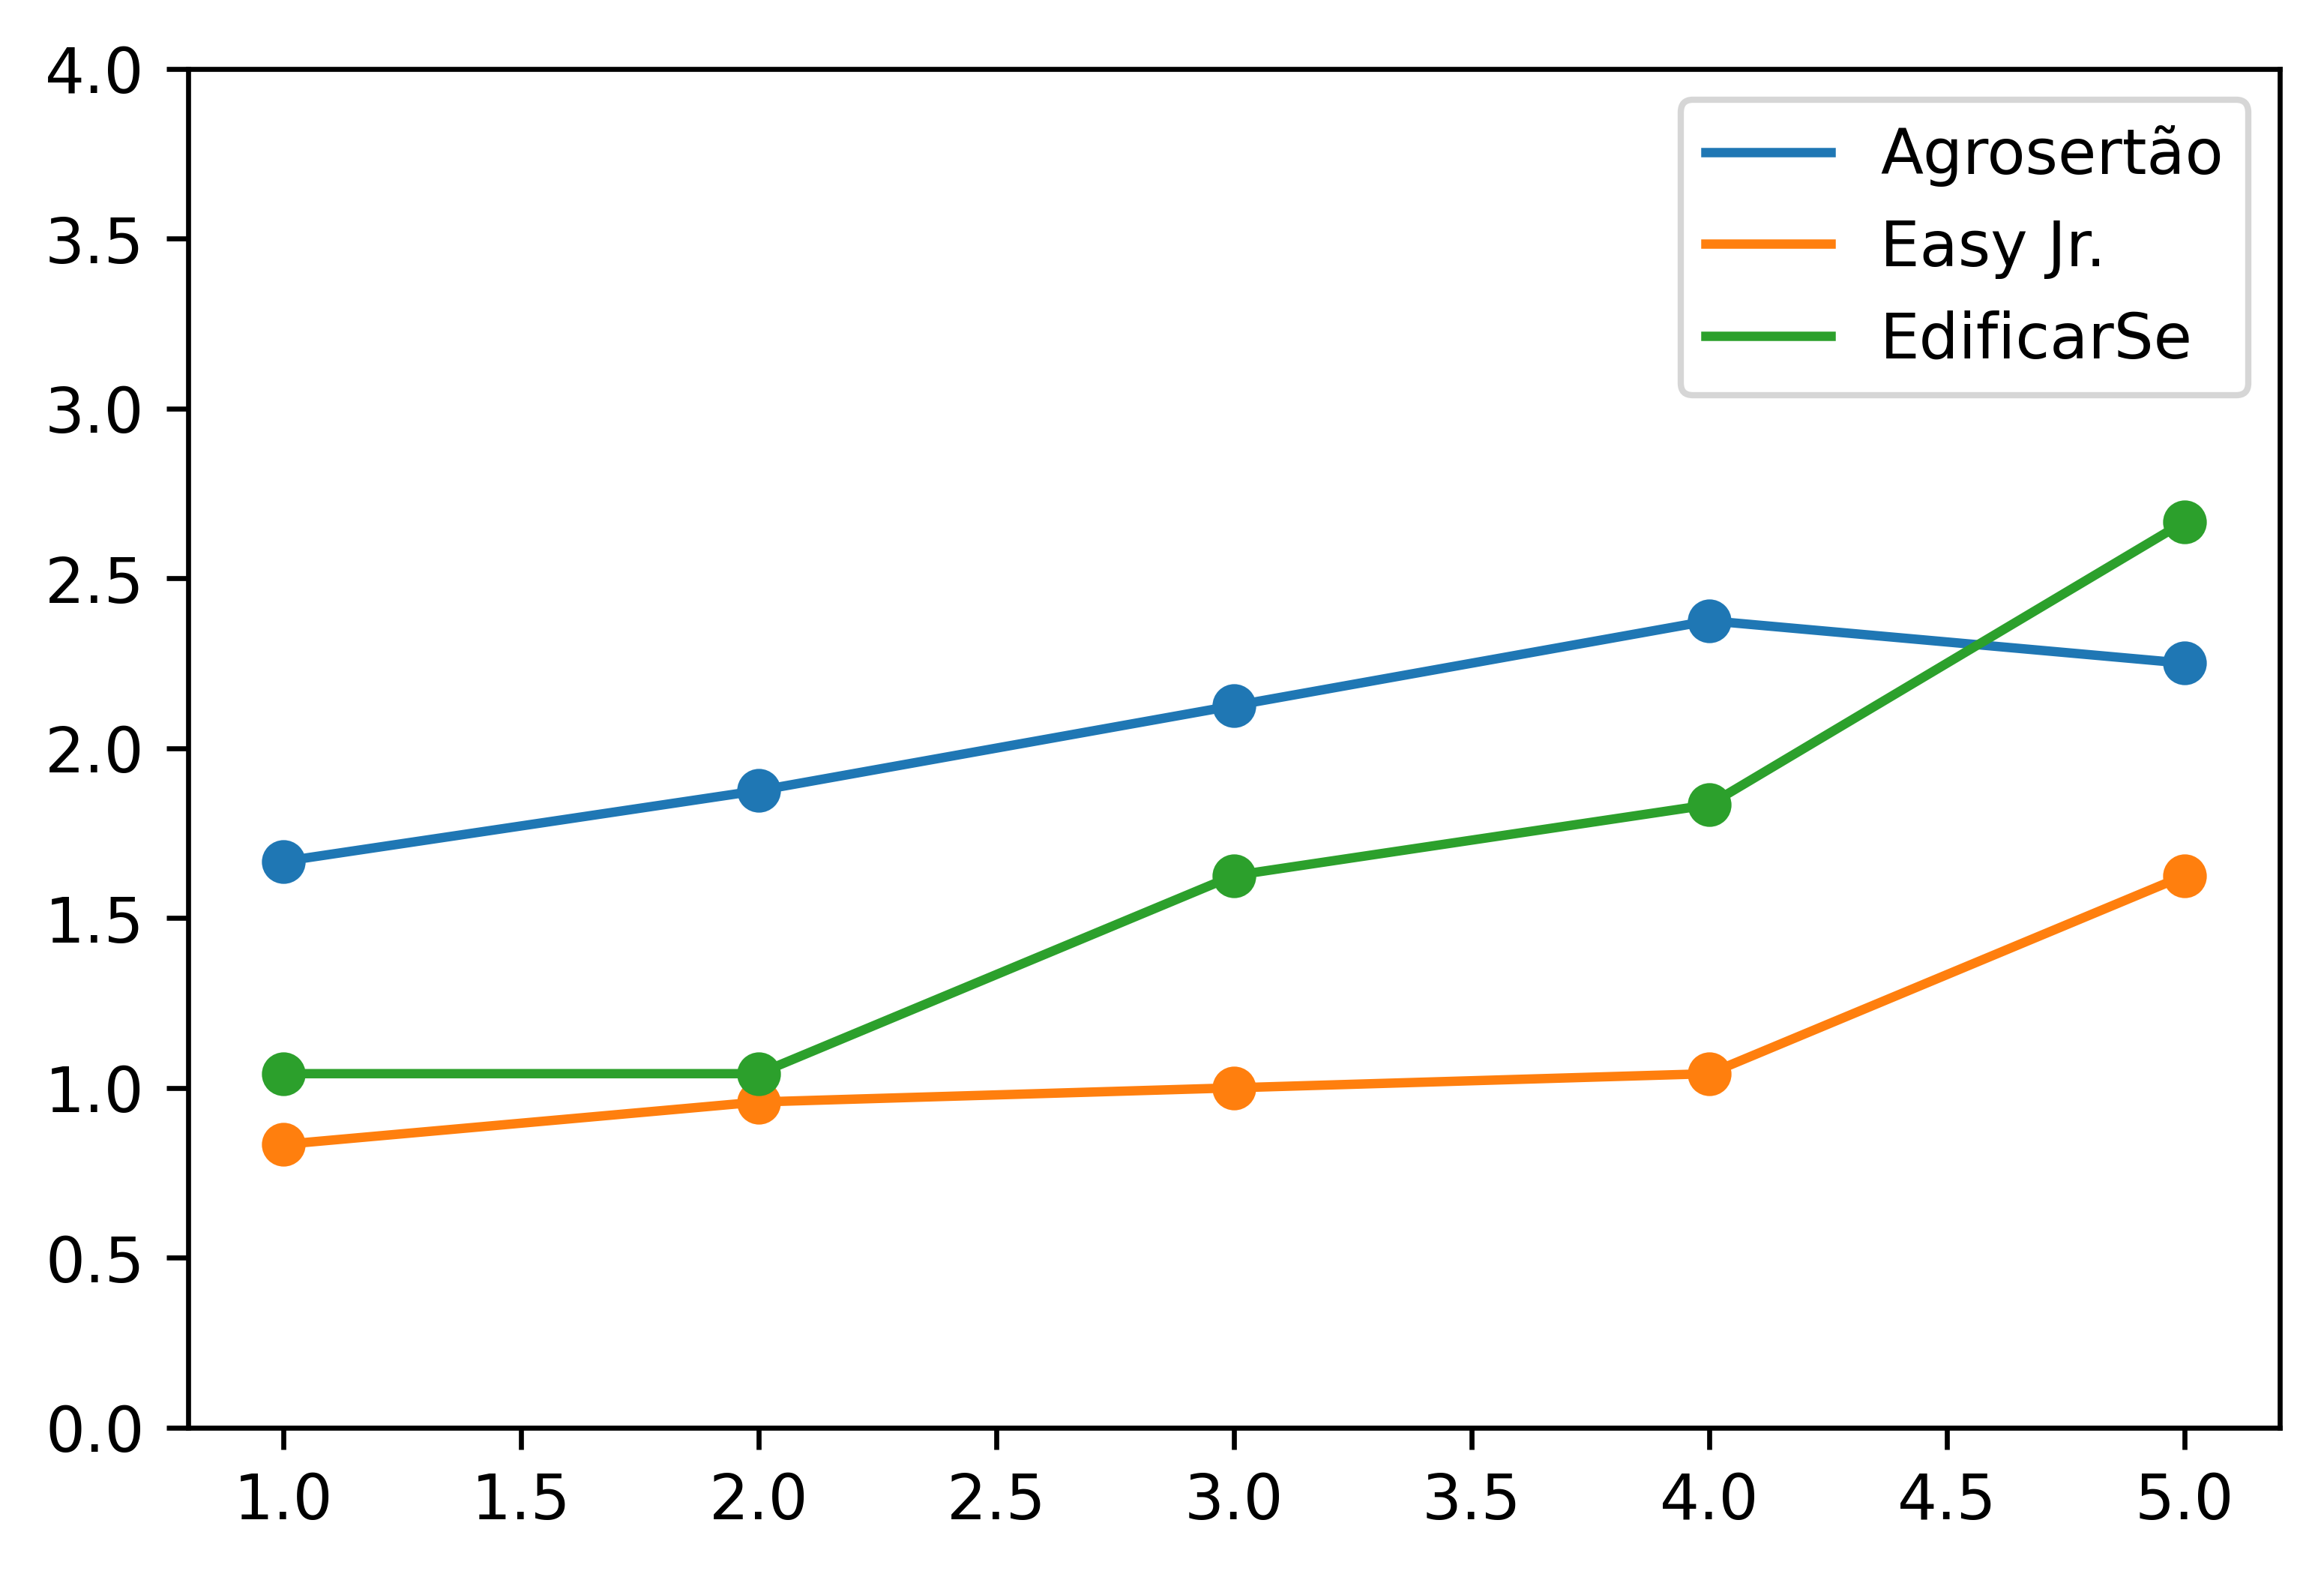

In [5]:
#Carrega as ferramentas de criação de gráficos
%matplotlib inline
from matplotlib import pyplot as plt

#Aumenta a qualidade dos gráficos
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

#Configura o eixo X do gráfico
X =[0, 1, 2, 3, 4, 5, 6]

#Mostra os sinais das 3 primeiras EJs
for sinal_de_EJ in sinais_das_EJs[:3]:
    
    #Traduz o sinal para base de entrada
    sinal_de_EJ = sinal_de_EJ.para_a_base("C")
    
    #Joga o sinal no gráfico
    plt.plot(X[1:-1], sinal_de_EJ.pontos[1:-1])
    plt.scatter(X[1:-1], sinal_de_EJ.pontos[1:-1])

#Define os limites do eixo y    
plt.ylim((0, 4))

#Adiciona uma legenda com os nomes das EJs do gráfico
plt.legend([sinal_de_EJ.name for sinal_de_EJ in sinais_das_EJs[:3]])

Interpretando o gráfico acima, notamos que as dores se acumulam de acordo com os clusters de maneira quase linear. Calculando a média dos sinais de todas as EJs, tem-se:

(0.0, 4.0)

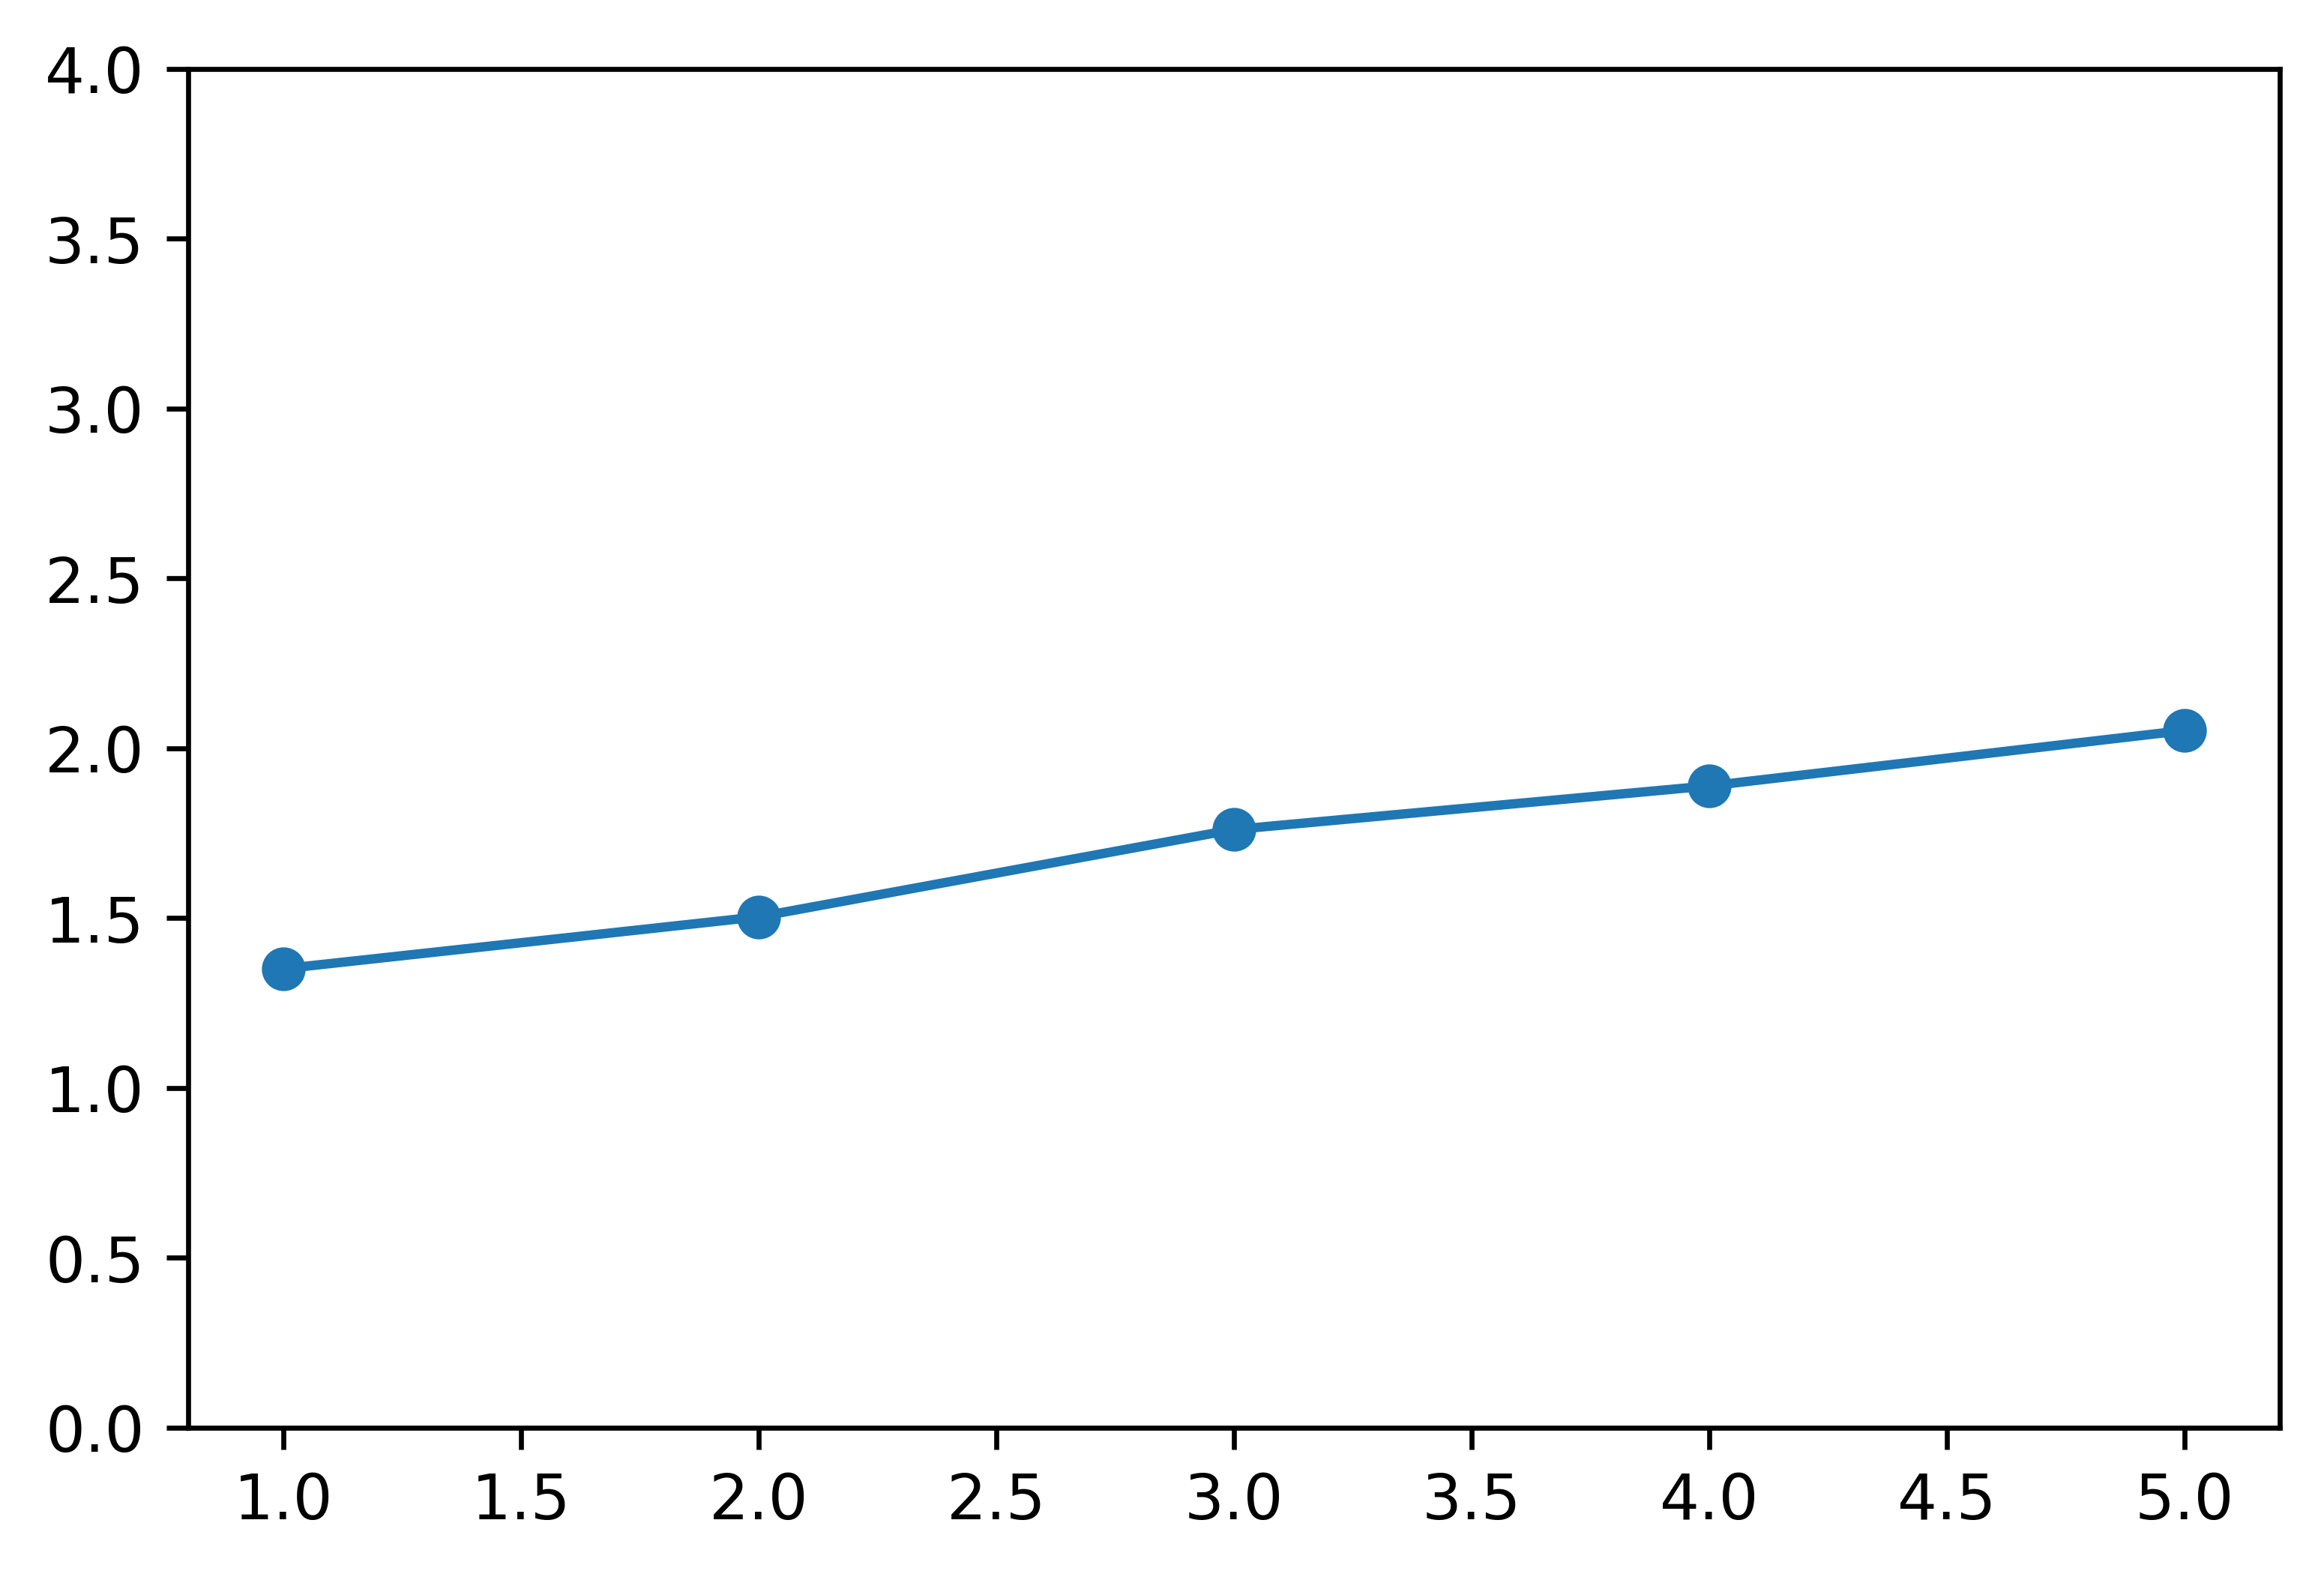

In [6]:
#Calcula a média
EJ_média = sum(sinais_das_EJs)/len(sinais_das_EJs)

#Joga no gráfico
EJ_média_em_C = EJ_média.para_a_base("C")
plt.plot(X[1:-1], EJ_média_em_C.pontos[1:-1])
plt.scatter(X[1:-1], EJ_média_em_C.pontos[1:-1])

#Define os limites do eixo y
plt.ylim((0, 4))


O que esse gráfico linear indica é que, na média, as dores se acumulam a cada cluster. Uma EJ de cluster 3, por exemplo, enxerga menos desafios de cluster 1 e 2 e mais desafios nas dores de cluster 4 e 5.

Seguindo com a PCA, subtrai-se a média de cada sinal para centralizá-los:

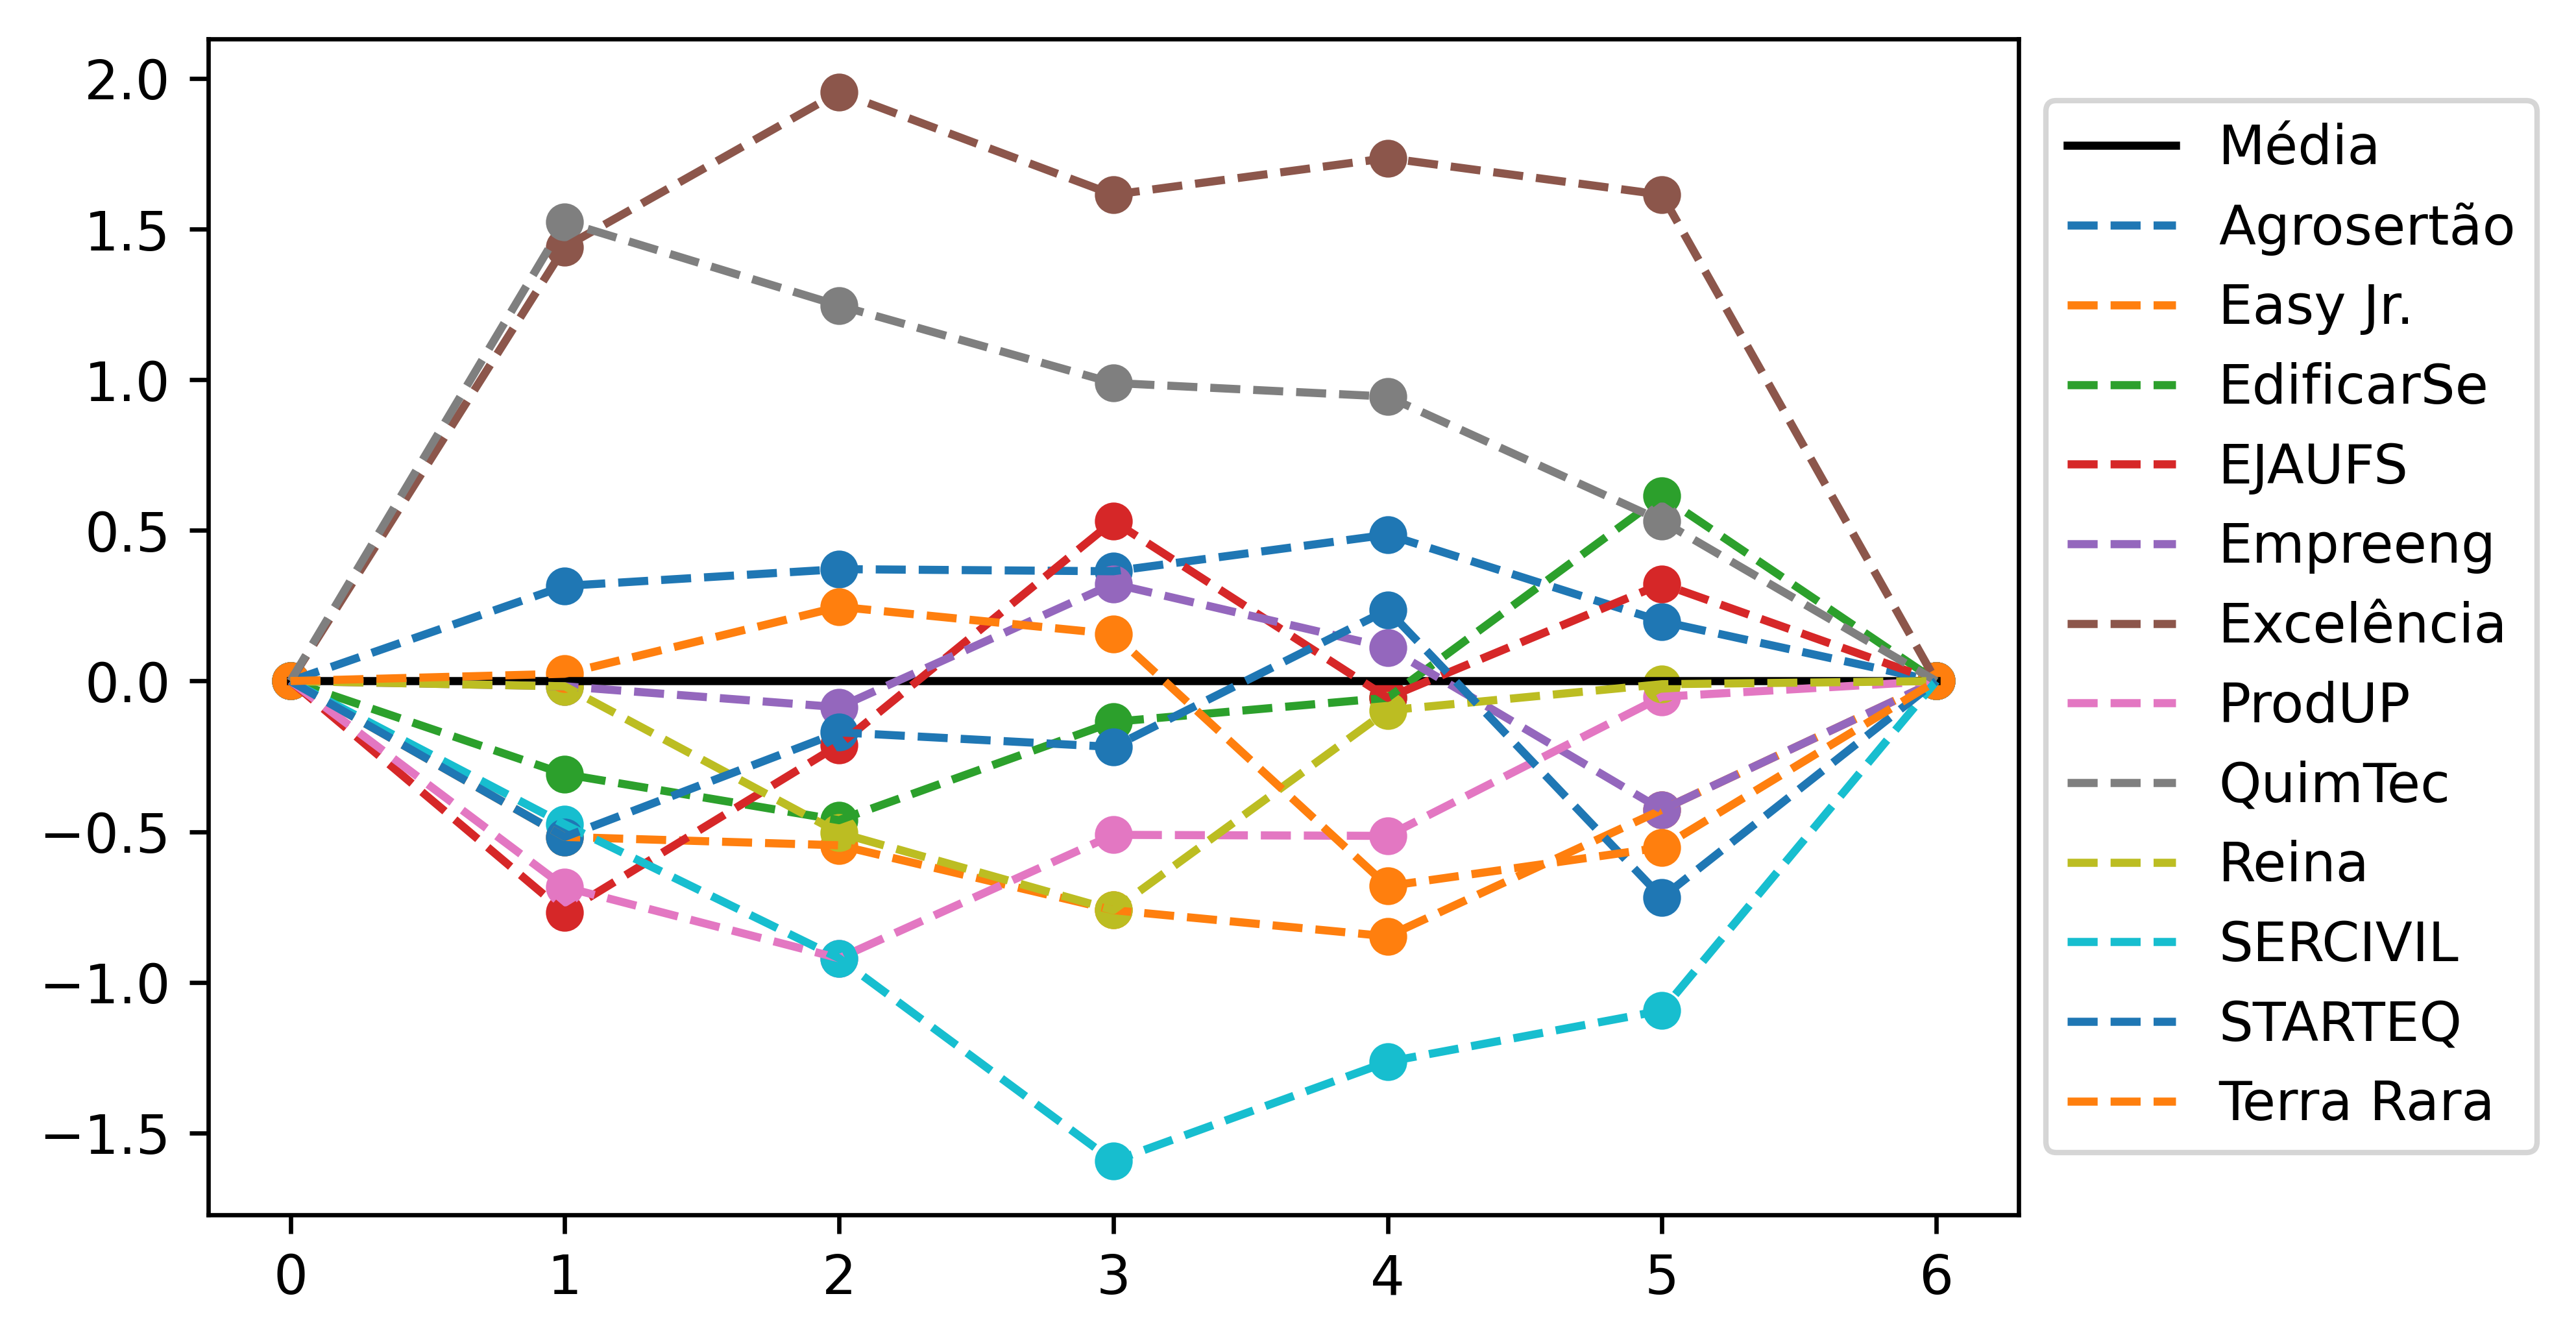

In [7]:
#Centraliza os sinais em relação à média
sinais_centrados = [EJ - EJ_média for EJ in sinais_das_EJs]

#Põe a média no gráfico em preto com traço cheio
plt.plot(X, [0] * 7, "black")

#Põe os sinais centrados no gráfico com traço vazado
for EJ in sinais_centrados:
    EJ = EJ.para_a_base("C")
    plt.plot(X, EJ.pontos, "--")
    plt.scatter(X, EJ.pontos)

#Adiciona a legenda
plt.legend(["Média"]
           + [sinal_de_EJ.name for sinal_de_EJ in sinais_das_EJs],
           loc="center left",
           bbox_to_anchor=(1, 0.5))

Encontrar as componentes principais consiste em determinar os eixos de maior variação a partir da média. Isto é feito a partir:

1. Da determinação da matriz de covariância. Ela estabelece como as dimensões dos dados estão relacionadas entre si.

2. Do cálculo dos autovetores e autovalores. Os autovetores representam os eixos, perpendiculares entre si, onde há maior variação. Seus autovalores representam quanto os dados variam na direção correspondente. 

In [8]:
#Traz a ferramenta de cálculo de autovetores e autovalores
from numpy.linalg import eig as auto

#Cálculo da matriz de covariância
cov = covariância_EJs = [
    [sum([sinais_centrados[k][i]
          * sinais_centrados[k][j]
                     for k in range(len(EJs))]
        )/len(EJs)
        
        for j in range(5)]
        for i in range(5)]

#Retorna as variâncias (autovalores) e suas
#correspondentes direções (autovetores)
variâncias, vetores = auto(cov)

#Consegue as posições das variâncias necessárias
#para que sejam dispostas em ordem decrescente
índices = variâncias.argsort()[::-1]

#Põe as variâncias e seus respectivos vetores em ordem decrescente
variâncias = variâncias[índices]
vetores = vetores[:, índices]

#Transforma as variâncias de vetores para números
variâncias = [float(var) for var in variâncias]

Para enxergar como a variância já calculada se distribui entre os eixos, constrói-se o ranking como abaixo:

In [9]:
#Cria o ranking mostrado abaixo
print("""
  Variância  Percentual
  
1° vetor:  {0:.2f}  | {5:.2f}% do total
2° vetor:  {1:.2f}  |  {6:.2f}% do total 
3° vetor:  {2:.2f}  |  {7:.2f}% do total 
4° vetor:  {3:.2f}  |  {8:.2f}% do total 
5° vetor:  {4:.3f} |  {9:.2f}% do total 
""".format(*variâncias,
           *[100 * var/sum(variâncias)
                   for var in variâncias]))


  Variância  Percentual
  
1° vetor:  8.67  | 97.04% do total
2° vetor:  0.21  |  2.32% do total 
3° vetor:  0.05  |  0.53% do total 
4° vetor:  0.01  |  0.09% do total 
5° vetor:  0.002 |  0.02% do total 



Visualizar dados que tem 5 dimensões é um desafio, mas utilizando somente os 2 primeiros vetores como eixos (que contém juntos 99,36% de toda a variação) para representar os dados em apenas duas dimensões, pode-se ter uma compreensão mais simples e sem perda de profundidade. Os vetores que concentram a maior parte da variância se chamam "componentes principais".

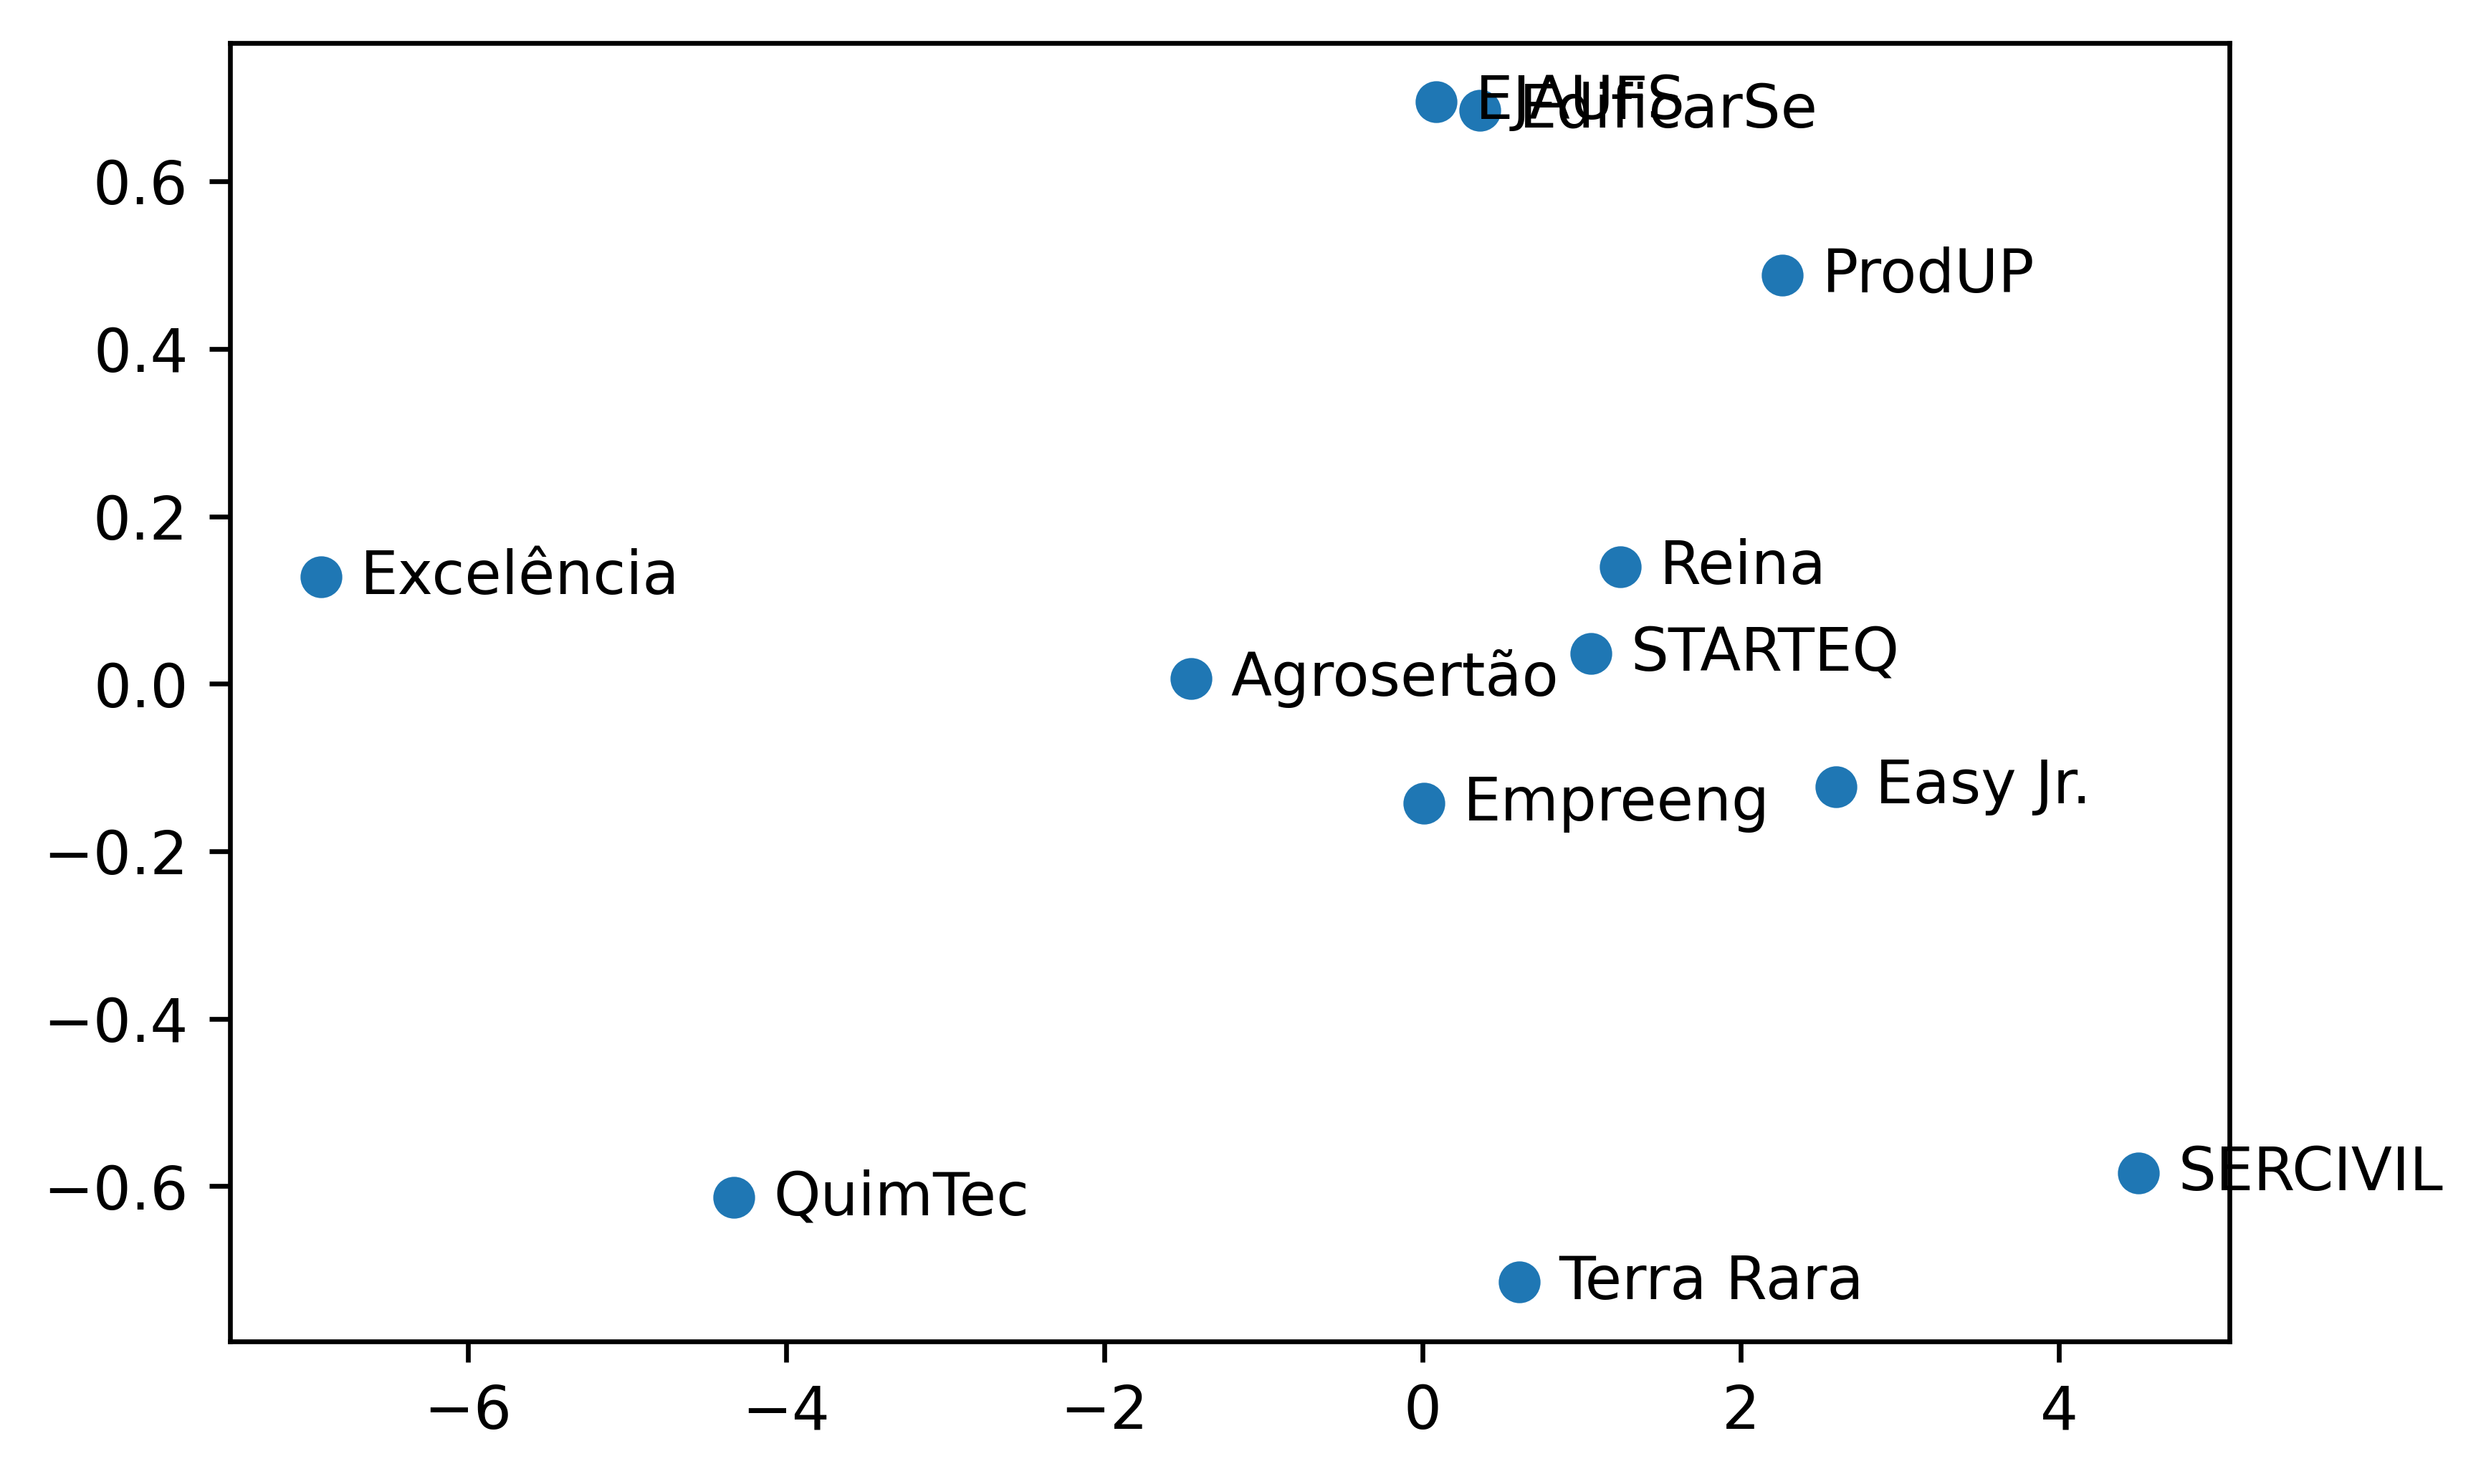

In [10]:
#Determina as coordenadas das projeções dos vetores das EJs
#no plano formado pelas 2 componentes principais
projeção = (vetores[:, [0, 1]].T
            @ np.hstack([sinal.T for sinal in sinais_centrados]))

#Gera o gráfico abaixo
plt.scatter(projeção[0], projeção[1])

#Adiciona o nome das EJs
for i, sinal in enumerate(sinais_das_EJs):
    plt.annotate(sinal.name, 
                 (projeção[0][i] + 0.25, projeção[1][i] - 0.02))

É interessante dividir as EJs em grupos de acordo com como elas se distribuíram no gráfico acima.

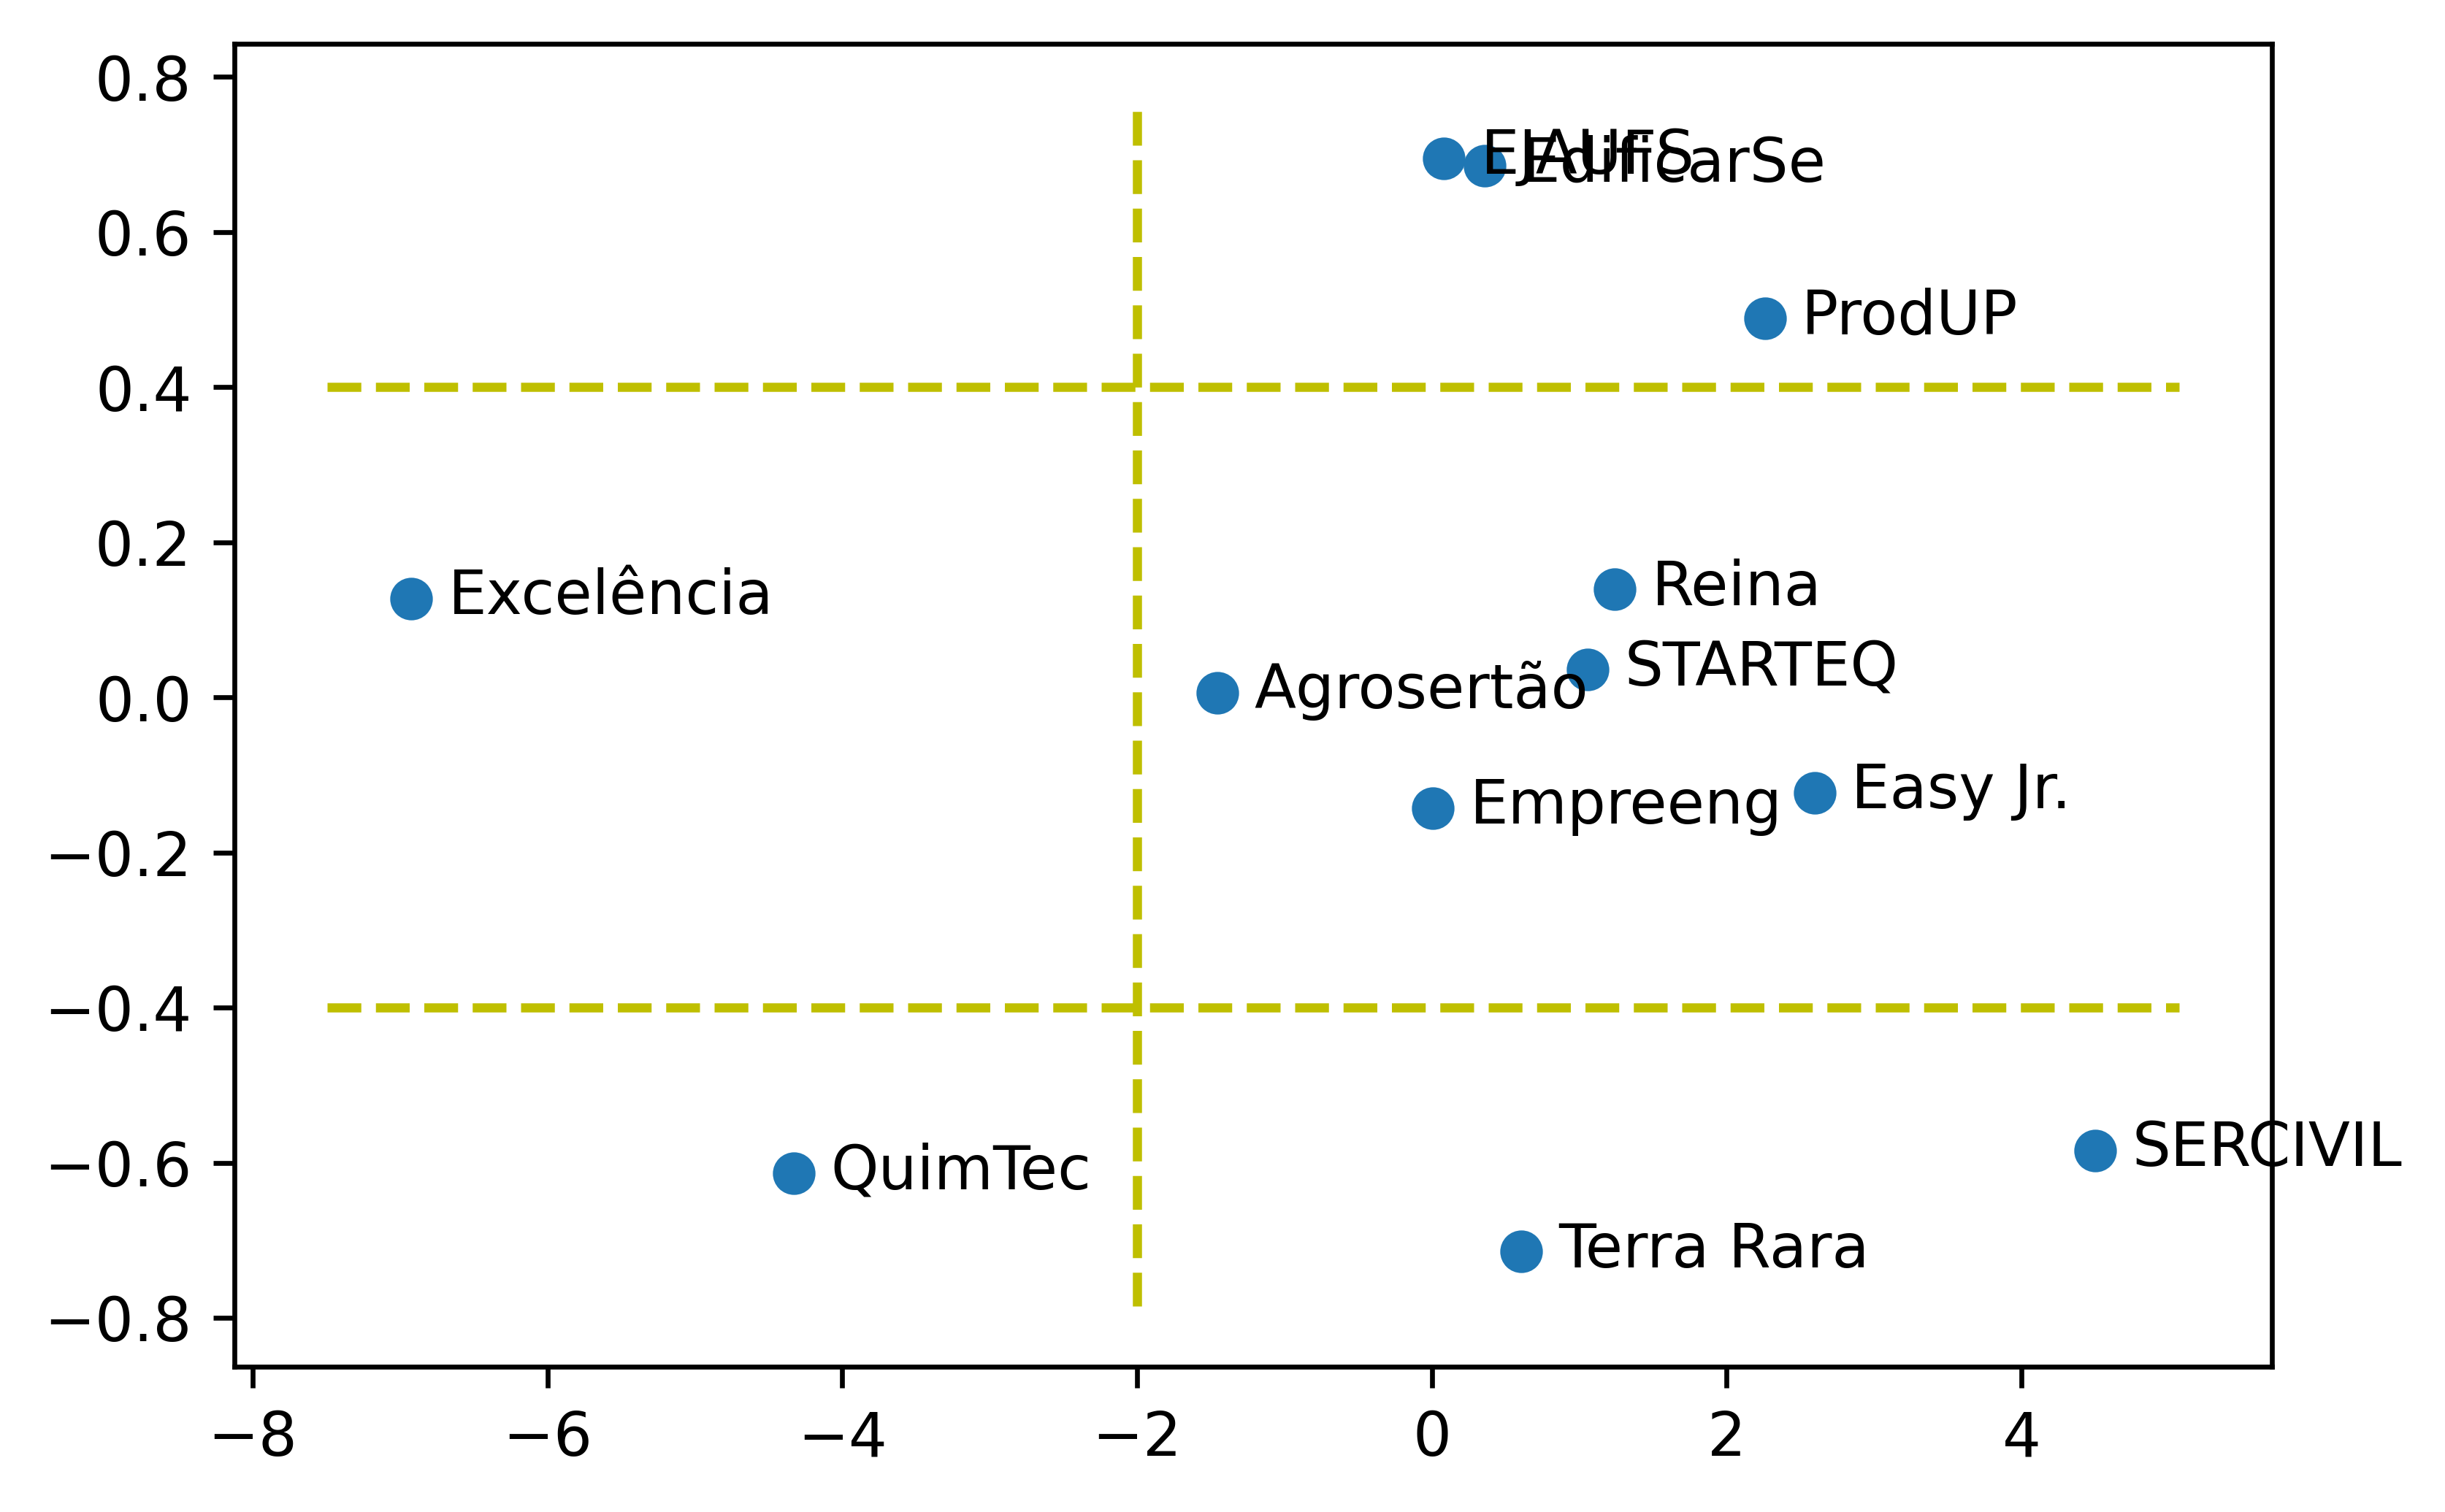

In [11]:
#Recria o gráfico acima
plt.scatter(projeção[0], projeção[1])

#Separa as EJs em grupos
for i, sinal in enumerate(sinais_das_EJs):
    x, y = projeção[0][i], projeção[1][i]
    if y > 0.4:
        if x < -2: pass
        else:     sinal.grupo = "Grupo 1"
    elif y > -0.4:
        if x < -2: sinal.grupo = "Grupo 2"
        else:      sinal.grupo ="Grupo 3"
    else:
        if x < -2: sinal.grupo = "Grupo 4"
        else:      sinal.grupo ="Grupo 5"
            
    plt.annotate(sinal.name, (x + 0.25, y - 0.02))

#Define os limites dos eixos (sem as margens)
y_lim_i, y_lim_s = plt.ylim()
x_lim_i, x_lim_s = plt.xlim()

#Traça as retas amarelas pontilhadas
plt.plot([x_lim_i, x_lim_s], [0.4, 0.4], "y--")
plt.plot([x_lim_i, x_lim_s], [-0.4, -0.4], "y--")
plt.plot([-2, -2], [y_lim_i, y_lim_s], "y--")

### Interpretação do Gráfico

As componentes principais calculadas para os dados das EJs foram:

$$
v_{1} = \begin{bmatrix}
-0.39\\ 
-0.48\\ 
-0.50\\ 
-0.47\\ 
-0.37
\end{bmatrix}, v_{2} = \begin{bmatrix}
-0.57\\ 
-0.42\\ 
0.05\\ 
0.39\\ 
0.58
\end{bmatrix}
$$

Pelos seus perfis, pode-se dizer que a primeira componente mede, a grosso modo, a intensidade das dores das EJs ao passo que a segunda mede o quanto as dores estão concentradas nos cluster maiores em detrimento dos menores.

Isto significa que, quanto mais para cima no gráfico a EJ está, maior é a maturidade autorrelatada. Em outras palavras, quanto mais para cima mais a EJ se considera madura. Quanto mais à esquerda, mais a EJ "sofre" de modo geral, isto é, mais forte ela sente as dores do formulário como um todo. 

Ao delinear os grupos, chegamos então a:

##### Grupo 1
*EdificarSe, EJAUFS e ProdUP*

EJs que se percebem como maduras e com dores moderadas. Suas dores são mais características dos clusters 4 e 5.

##### Grupo 2
*Excelência*

EJ que se percebe como moderadamente madura e com dores fortes. Suas dores são intensas e diversas: não se enquadram bem em um cluster ou outro.

##### Grupo 3
*REINA, STARTEQ, AgroSertão, Easy e Empreeng*

EJs que se percebem como moderadamente maduras e com dores amenas. Suas dores são menos intensas e mais diversas: não se enquadram bem em um cluster ou outro.

##### Grupo 4
*QuimTec*

EJ que se percebe como imatura e com dores fortes. Suas dores são intensas e concentradas nos clusters 1 e 2.

##### Grupo 5
*Terra Rara e SERCIVIL*

EJs que se percebem como imaturas e com dores amenas. Suas dores são menos intensas e concentradas nos clusters 1 e 2.

Abaixo se mostra o perfil das dores de cada grupo em relação à média.

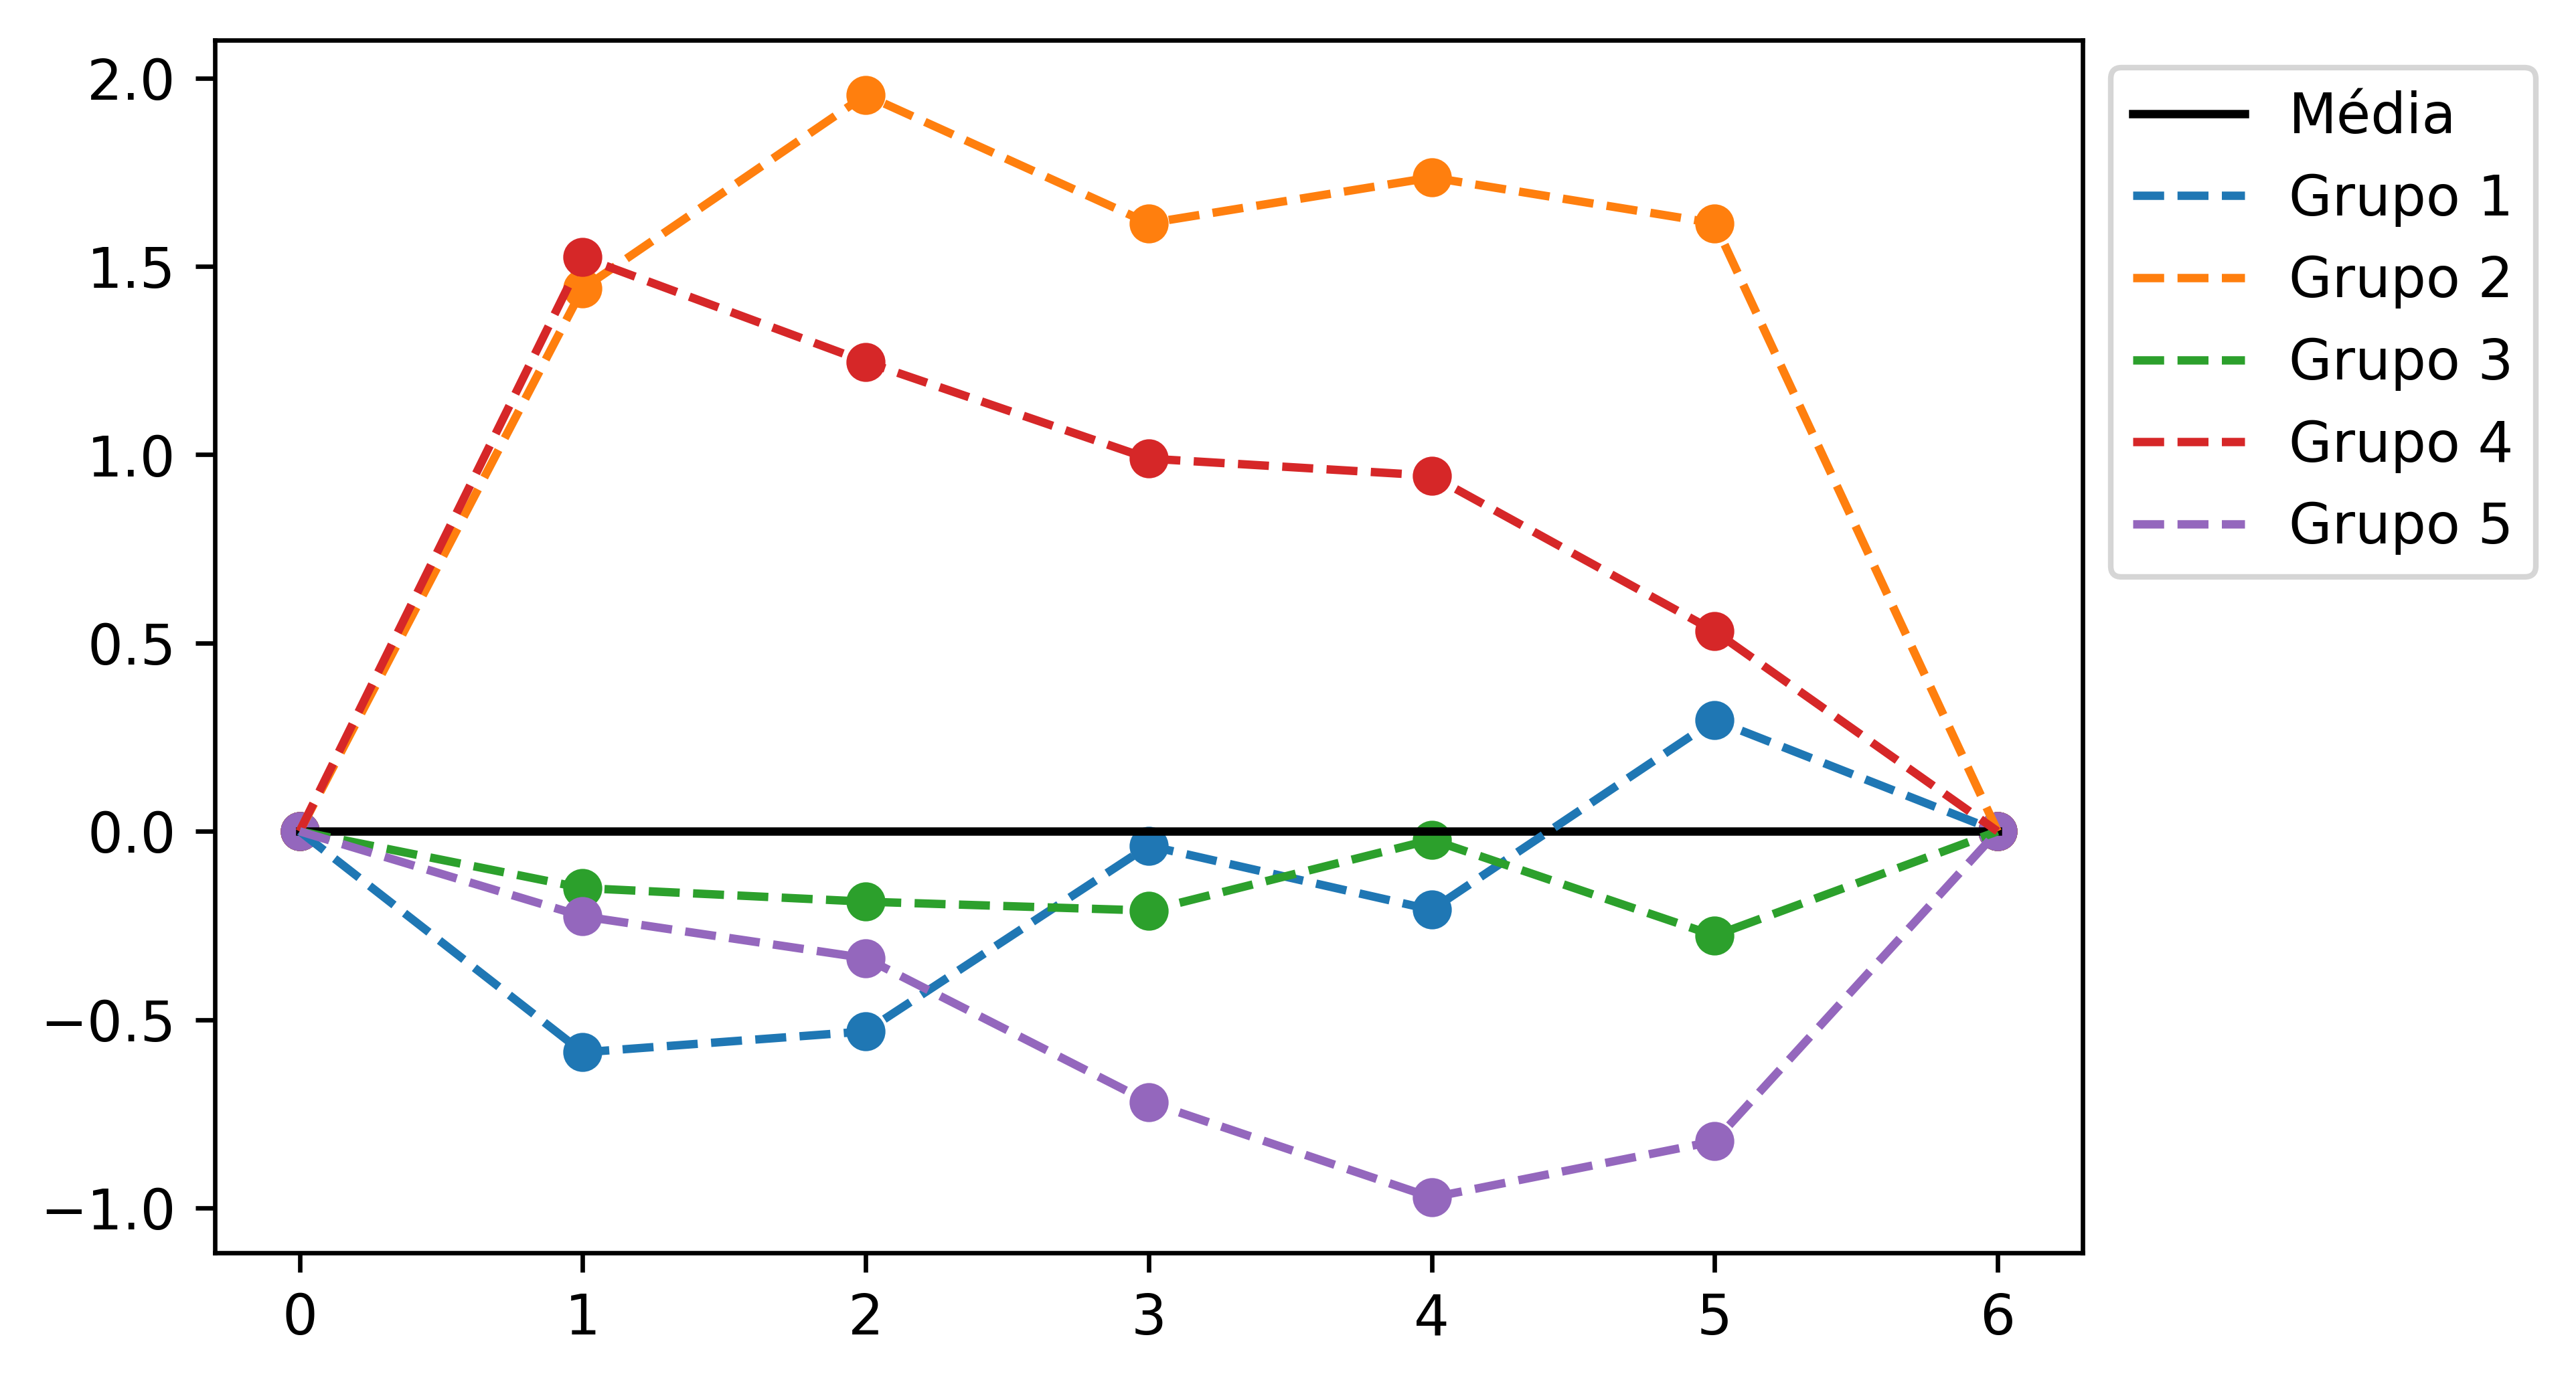

In [12]:
#Cria um contêiner para armazenar as médias de cada grupo
Média_Grupo = dict()

#Põe a média geral no gráfico em preto com traço cheio
plt.plot(X, [0] * 7, "black")

#Gera um índice que varia de 1 a 5
for i in range(1, 5 + 1):
    
    #Retorna uma lista com as EJs do grupo
    EJs_do_grupo = [EJ for EJ in sinais_das_EJs
                    if EJ.grupo == "Grupo {}".format(i)]
    
    #Calcula a média das EJs na lista e põe no contêiner
    Média_Grupo[i] = sum(EJs_do_grupo)/len(EJs_do_grupo)
    
#Para cada grupo cuja média foi calculada
for i in Média_Grupo:
    
    #Joga no gráfico com linha tracejada e pontos marcados
    plt.plot(X, (Média_Grupo[i] - EJ_média).para_a_base("C").pontos, "--")
    plt.scatter(X, (Média_Grupo[i] - EJ_média).para_a_base("C").pontos)

#Adiciona a legenda
plt.legend(["Média"]
           + ["Grupo {}".format(i) for i in range(1, 5 + 1)],
           bbox_to_anchor=(1, 1))

In [13]:
#Cria uma tabela para identificar o grupo de cada EJ
grupos = pd.DataFrame(columns=["EJs", "Grupo"])

#Preenche as linhas da tabela
for EJ in sinais_das_EJs:
    grupos = grupos.append(
                 pd.Series([EJ.name, int(EJ.grupo[-1])],
                           index=["EJs", "Grupo"]),
                 ignore_index=True)
    
#Salva a tabela num arquivo CSV
grupos.to_csv(os.path.join("resultado", "pca", "grupos.csv"),
              index=False)

### Análise Fatorial

Esta técnica consiste em olhar para as respostas que estão mais correlacionadas e, a partir delas, inferir fatores ocultos. A premissa é que, se um mesmo grupo de perguntas quase sempre tem o mesmo padrão de respostas, existe algo por trás delas que faz com que elas estejam relacionadas. A este algo se dá o nome de "fator".

In [14]:
#Importa do R os dados não processados
%R -o entrada

#Mostra um recorte da tabela original
entrada.iloc[:, :35:5]

,EJs,MN_3_1,MN_5_2,VM_3_1,VM_5_2,GO_3_1,GO_5_2
1,Excelência,4,4,4,4,3,2
2,QuimTec,3,2,3,3,2,1
3,Empreeng,2,1,3,2,1,3
4,Terra Rara,1,0,1,3,3,0
5,STARTEQ,3,2,2,4,2,1
6,Easy Jr.,1,2,0,3,0,0
7,Reina,1,3,2,2,2,2
8,SERCIVIL,0,2,0,1,0,0
9,EJAUFS,2,3,2,3,2,0
10,ProdUP,2,2,0,2,0,1


Para garantir que a Análise Fatorial pode ser aplicada aos dados, realiza-se o teste Kaiser-Meyer-Olkin que deve resultar em um valor entre **0,5** e **1**.

In [15]:
#Prepara os dados para análise
dados = pd.concat([entrada]*100)
dados.drop("EJs", axis=1, inplace=True)

#Traz o método de validação da Análise Fatorial para uso
from factor_analyzer.factor_analyzer import calculate_kmo as KMO

#Realiza o teste
_, kmo = KMO(dados)

#Mostra o resultado
"KMO dos dados: {:.3f}".format(kmo)

'KMO dos dados: 0.573'

Garantido que os dados comportam a análise, seleciona-se o número de fatores ocultos relevantes. Para tal, basta que eles possuam uma influência de ao menos uma unidade na variância dos dados.

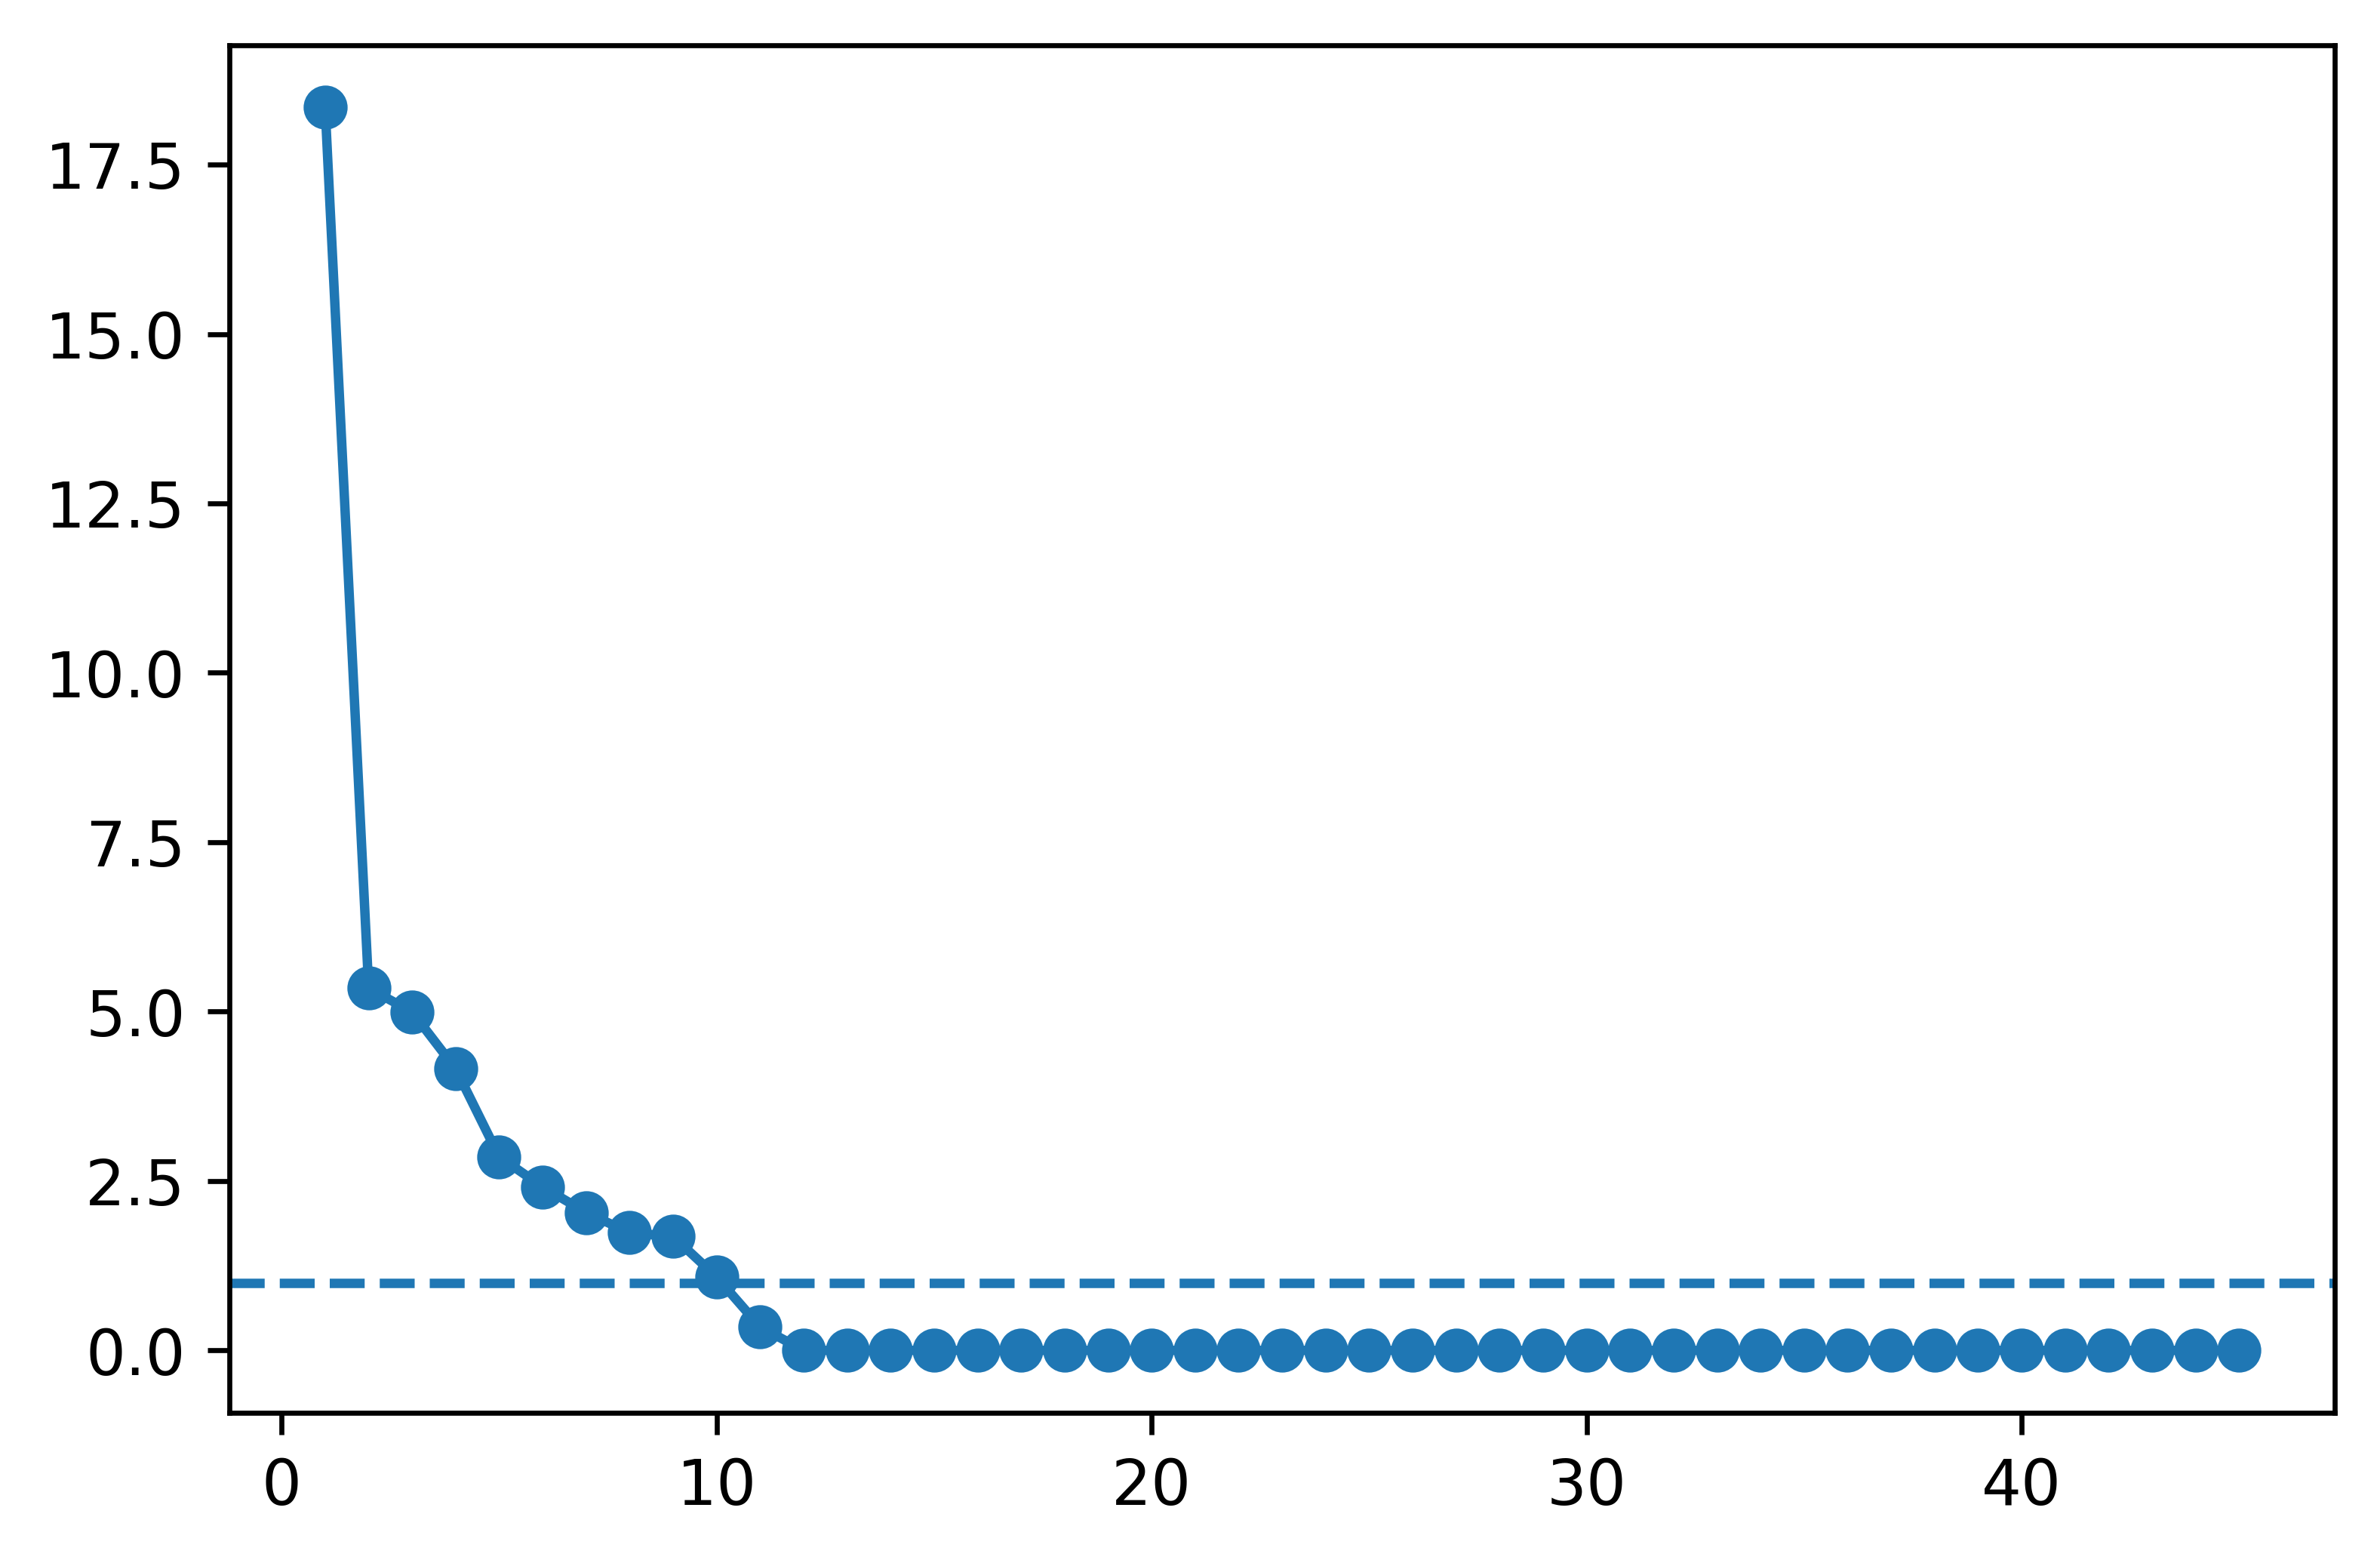

In [16]:
#Traz a ferramenta de Análise Fatorial para uso
from factor_analyzer import FactorAnalyzer

#Realiza a análise chutando que existem 10 fatores
#não observados de forma direta
fa = FactorAnalyzer(n_factors=10).fit(dados)

#Retorna as variância correspondentes
variâncias, vetores = fa.get_eigenvalues()

#Mostra as variâncias no gráfico abaixo
plt.scatter(range(1, len(variâncias) + 1), variâncias)
plt.plot(range(1, len(variâncias) + 1), variâncias)
plt.axhline(1, ls="--")

9 fatores se mostraram relevantes, isto é, ficaram acima da linha da variância 1. O próximo passo é entender em quais dores cada fator impacta:

In [17]:
#Realiza a análise considerando 9 fatores ocultos
fa = FactorAnalyzer(n_factors=9, rotation="varimax", method="ml").fit(dados)

#Forma uma tabela com o peso que cada fator tem em cada uma das dores
pesos = pd.DataFrame(fa.loadings_,
                     index=dados.columns,
                     columns=["Fator {}".format(i) for i in range(1, 9 + 1)])

#Mostra as dez primeiras linhas da tabela
pesos.head(10)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9
MN_1_1,0.165863,0.156729,-0.099074,-0.303986,0.152883,0.118909,0.837018,0.197010,0.038823
MN_1_2,0.467965,0.283144,0.062716,-0.009362,0.388908,0.348728,0.127859,0.227078,0.564271
MN_2_1,0.763016,-0.114252,0.182136,-0.218509,0.284381,-0.087395,0.398853,0.120707,0.107130
MN_2_2,0.122086,0.177899,0.132584,-0.157743,0.885942,0.098687,-0.075198,0.131498,-0.109940
MN_3_1,0.396346,0.219025,0.634883,0.172464,0.054146,0.457925,0.322871,0.140987,-0.139148
MN_3_2,0.021513,0.096160,0.898025,0.063376,0.201213,0.314445,-0.143336,-0.018116,0.126864
MN_4_1,0.604088,0.479384,0.103533,0.157795,-0.059210,0.137062,0.378441,0.141942,0.419797
MN_4_2,0.167583,0.106986,0.165959,0.320863,0.065342,0.886544,-0.061881,-0.088927,0.129392
MN_5_1,0.292497,0.738750,0.130167,-0.088250,0.475339,0.238784,0.138722,0.119995,-0.090228
MN_5_2,0.037294,0.510999,0.058503,0.151207,-0.155632,0.693862,-0.140415,-0.305848,-0.259834


Os números acima mostram a correlação entre cada dor e fator. A correlação é uma medida estatística que mede o quanto dois fenômenos se comportam de forma parecida. Uma correlação +1.0 indica uma associação perfeita, isto é, quando um dos fenômenos varia para cima o outro também o faz, na mesma proporção. Uma correlação de 0 indica que os dois são completamente independentes. Uma correlação de -1 indica uma associação também perfeita, porém quando um dos fenômenos varia numa direção o outro o faz na direção oposta e em mesma proporção .

Para cada fator, é interessante saber em quais dores este mais influencia, isto é, com quais dores ele mais se correlaciona em termos absolutos.

In [18]:
#Número de linhas da tabela
n = número_de_linhas = 10

#Cria uma tabela para o ranking inicialmente vazia
ranking = pd.DataFrame()

#Pega a lista de fatores a partir dos nomes
#das colunas da tabela de pesos
fatores = pesos.columns

#Para cada fator dentre todos os fatores
for fator in fatores:
    
    #Gera as posições de cada correlação na forma ordenada
    ordenação = np.array([abs(p) for p in pesos[fator]]).argsort()[::-1]
    
    #Coloca dentro da tabela do ranking as 10 primeiras
    #dores de acordo com a ordenação
    ranking[fator] = pesos.index[ordenação][:n]
    
    #Coloca dentro da tabela do ranking as influências (ou correlações)
    #de cada uma das primeiras dores
    ranking["Inf. de F{}".format(fator[-1])] = \
        np.array(pesos[fator])[ordenação][:n]
    
#Gera os índices do ranking
ranking.index = range(1, número_de_linhas + 1)

#Mostra a tabela abaixo
ranking

,Fator 1,Inf. de F1,Fator 2,Inf. de F2,Fator 3,Inf. de F3,Fator 4,Inf. de F4,Fator 5,Inf. de F5,Fator 6,Inf. de F6,Fator 7,Inf. de F7,Fator 8,Inf. de F8,Fator 9,Inf. de F9
1,GO_3_1,0.917683,GO_5_1,0.965753,MN_3_2,0.898025,GO_2_1,0.866394,MN_2_2,0.885942,MN_4_2,0.886544,MN_1_1,0.837018,GO_3_2,0.873280,VM_5_2,-0.639275
2,GO_2_2,0.875279,VM_3_2,0.757908,TC_5_2,0.861995,TC_1_2,-0.842706,TC_1_1,0.760259,MN_5_2,0.693862,VM_5_1,-0.809410,TC_3_2,0.653983,MN_1_2,0.564271
3,TC_2_1,0.835660,VM_4_2,0.740708,TC_4_2,0.817665,GO_1_2,0.788724,TC_3_3,0.692766,TC_2_3,0.648897,GO_5_2,0.496079,TC_2_2,0.515690,VM_1_2,0.520360
4,MN_2_1,0.763016,MN_5_1,0.738750,GO_4_1,0.666042,VM_2_2,0.634309,TC_4_3,0.562047,VM_1_1,0.628113,MN_2_1,0.398853,GO_5_2,-0.414746,TC_2_2,0.462843
5,VM_1_2,0.755241,GO_5_3,0.721749,TC_5_1,0.652778,VM_4_1,0.527220,TC_1_3,0.486976,GO_4_2,0.542143,MN_4_1,0.378441,VM_2_1,0.372791,GO_4_1,0.444507
6,TC_4_1,0.713554,GO_4_2,0.662897,MN_3_1,0.634883,TC_3_3,0.467550,MN_5_1,0.475339,MN_3_1,0.457925,TC_4_3,0.337931,GO_1_2,-0.355130,MN_4_1,0.419797
7,VM_3_1,0.641267,VM_1_1,0.540335,TC_3_1,0.582056,GO_1_1,0.457179,TC_2_2,0.436382,VM_2_1,0.437593,MN_3_1,0.322871,TC_2_1,0.317777,TC_4_1,-0.353623
8,VM_4_1,0.607418,MN_5_2,0.510999,TC_1_3,0.563642,VM_2_1,0.411636,GO_1_1,0.404005,TC_5_1,0.403224,GO_5_3,-0.322545,MN_5_2,-0.305848,VM_2_2,0.336451
9,MN_4_1,0.604088,VM_3_1,0.500844,TC_2_2,0.482141,VM_3_1,0.382924,MN_1_2,0.388908,GO_1_1,0.390569,TC_1_1,-0.313128,VM_4_1,0.256552,TC_1_1,0.321068
10,TC_4_3,0.590221,MN_4_1,0.479384,TC_3_2,0.469915,TC_3_1,0.375446,VM_4_2,0.382114,MN_1_2,0.348728,VM_3_1,0.299400,TC_3_1,0.250847,VM_1_1,0.286716


Para entender a relevância de cada um desses fatores nas respostas como um todo, é possível calcular a influência que estes tem nas 10 dores com as quais estão mais correlacionados.

In [19]:
#Soma os quadrados das correlações para cada
#fator e mostra o resultado logo abaixo
ranking.iloc[:, 1::2].apply(
    lambda x: "{:.2f}%".format(10 * sum([a**2 for a in x])))

Inf. de F1    54.62%
Inf. de F2    45.96%
Inf. de F3    46.01%
Inf. de F4    36.48%
Inf. de F5    32.73%
Inf. de F6    32.15%
Inf. de F7    24.14%
Inf. de F8    22.17%
Inf. de F9    20.09%
dtype: object

Pela disposição dos dados, e também por ser preferível trabalhar com menos agrupamentos, cabe limitar a análise aos 5 primeiros fatores.

É necessário portanto refazer a análise considerando apenas 5 fatores.

In [20]:
#Realiza a análise considerando 5 fatores ocultos
fa = FactorAnalyzer(n_factors=5, rotation="varimax", method="ml").fit(dados)

#Forma uma tabela com o peso que cada fator tem em cada uma das dores
pesos = pd.DataFrame(fa.loadings_,
                     index=dados.columns,
                     columns=["Fator {}".format(i) for i in range(1, 5 + 1)])

#Cria uma tabela para o ranking inicialmente vazia
ranking = pd.DataFrame()

#Pega a lista de fatores a partir dos nomes
#das colunas da tabela de pesos
fatores = pesos.columns

#Para cada fator dentre todos os fatores
for fator in fatores:
    
    #Gera as posições de cada correlação na forma ordenada
    ordenação = np.array([abs(p) for p in pesos[fator]]).argsort()[::-1]
    
    #Coloca dentro da tabela do ranking as
    #dores de acordo com a ordenação
    ranking[fator] = pesos.index[ordenação]
    
    #Coloca dentro da tabela do ranking as influências
    #(ou correlações) de cada uma das primeiras dores
    ranking["Inf. de F{}".format(fator[-1])] = \
        np.array(pesos[fator])[ordenação]
    
#Gera os índices do ranking
ranking.index = range(1, 45 + 1)

#Mostra a tabela abaixo
ranking.head(10)

,Fator 1,Inf. de F1,Fator 2,Inf. de F2,Fator 3,Inf. de F3,Fator 4,Inf. de F4,Fator 5,Inf. de F5
1,TC_4_2,0.853156,GO_3_1,0.798775,GO_4_2,0.845358,TC_1_2,-0.870513,VM_5_1,0.835393
2,TC_1_3,0.851683,VM_1_2,0.792883,MN_5_2,0.801691,GO_1_2,0.787877,GO_5_2,-0.697195
3,TC_5_2,0.841060,TC_2_1,0.789181,GO_5_1,0.793962,GO_2_1,0.781722,MN_2_2,0.530751
4,MN_3_2,0.820368,VM_4_1,0.759614,VM_1_1,0.771293,MN_1_1,-0.617111,TC_1_1,0.525341
5,TC_3_3,0.759320,MN_4_1,0.740843,VM_4_2,0.758845,MN_2_1,-0.480804,VM_4_1,-0.465970
6,TC_4_3,0.676415,VM_3_1,0.691753,VM_3_2,0.743481,MN_4_2,0.467450,TC_2_2,0.460082
7,MN_3_1,0.666540,GO_2_2,0.684332,GO_5_3,0.730563,TC_5_1,0.460589,TC_5_2,-0.410743
8,TC_2_3,0.666321,TC_4_1,0.680922,MN_5_1,0.724547,VM_5_2,-0.422553,VM_3_1,-0.397890
9,TC_1_1,0.660594,VM_2_1,0.680073,TC_5_1,0.579855,VM_2_2,0.371977,GO_5_3,0.393794
10,TC_3_1,0.620841,MN_2_1,0.660356,GO_4_1,0.549059,VM_4_1,0.355448,TC_4_1,-0.362180


Finalmente, para atribuir significado a cada fator pode-se checar quais são as dores em que mais influenciam

In [21]:
#Importa as descrições das dores da planilha na pasta "dados"
descrição = pd.read_csv(os.path.join("dados", "descrição_das_dores.csv"))

#Para cada fator dentre todos os fatores
for fator in fatores:
    
    #Mostra, ali embaixo, qual fator está sendo analisado
    print("Dores associadas ao Fator {}:\n".format(fator[-1]))
    
    #Para um índice que varia de 1 a 5
    for i in range(1, 5 + 1):
        
        #Mostra a dor correspondente ao índice do ranking
        print("{}. {: .2f}% - {}: {}\n".format(
              i,
              100 * ranking["Inf. de F{}".format(fator[-1])][i],
              ranking[fator][i],
              descrição[ranking[fator][i]][0]))

    #Separa duas linhas entre fatores
    print("\n\n")

Dores associadas ao Fator 1:

1.  85.32% - TC_4_2: Nosso time é pouco empoderado para assumir maiores responsabilidades.

2.  85.17% - TC_1_3: Não existe uma formação de time na EJ com uma coesão interna suficiente para que todos compartilhem dos mesmos objetivos e sejam responsáveis.

3.  84.11% - TC_5_2: Não conseguimos garantir a melhor performance de todos os membros reforçada pela cultura forte da EJ.

4.  82.04% - MN_3_2: Não somos ágeis no gerenciamento dos nossos projetos.

5.  75.93% - TC_3_3: A essência da nossa cultura não é vivida diariamente e precisa ser reforçada constantemente.




Dores associadas ao Fator 2:

1.  79.88% - GO_3_1: Não conseguimos ser eficientes em traçar e monitorar estratégias para a nossa EJ.

2.  79.29% - VM_1_2: Não temos um processo de vendas estruturado, nem um bom volume de negociação.

3.  78.92% - TC_2_1: O engajamento dos nossos membros é muito desproporcional, o que gera picos de produtividade e inconstância de resultados.

4.  75.96% - VM_4

#### Interpretação dos Fatores

##### Fator 1

O Fator 1 diz respeito a dores associadas com um time pouco empoderado e responsável em EJs cuja cultura está enfraquecida. Decidiu-se por atribuir o nome de **Fragilidade da Cultura**.

##### Fator 2

O Fator 2 correlaciona dores associadas a processos de vendas mal estruturados e inefetivos. A ele, optou-se denonimar por **Inefetividade do Processo de Vendas**.

##### Fator 3

O Fator 3 diz respeito a dores que estão associadas com a capacidade de inovação das EJs. Portanto, será referido posteriormente como **Dificuldade de Inovar**

##### Fator 4

O Fator 4 indica um perfil de EJ que sofre com poucos membros projetistas e com processos internos mal-estruturados, muito embora possua membros capacitados que sabem diagnosticar os problemas de seus clientes. Sendo assim, referir-se-á por **Dificuldade de Gerir Projetos**.

##### Fator 5

O Fator 5 aglomera dores associadas com a dificuldade em alocar recursos financeiros e humanos de forma a trazer os resultados desejados pela EJ. Por isto, atribuiu-se o nome de **Dificuldade de Alavancagem**.

Quanto cada um desses fatores conseguem explicar o padrão de respostas de cada EJ? 

In [22]:
#Normaliza as linhas da entrada
dados = entrada.set_index("EJs")
dados["soma"] = dados.sum(axis=1)
dados = dados.iloc[:, :45].div(dados["soma"], axis=0)

#Aplica o peso de cada fator a cada resposta normalizada
#onde o peso é maior que 0.5
resultado = pd.DataFrame(dados.values
                         @ pesos.applymap(
                             lambda x: x if abs(x) > 0.5 else 0).values)

#Nomeia as linhas com suas respectivas EJs
resultado.index = entrada["EJs"]

#Nomeia as colunas com os fatores
resultado.columns =["Fragilidade da Cultura",
                    "Inefetividade do Processo de Vendas",
                    "Dificuldade de Inovar",
                    "Dificuldade em Gerir Projetos",
                    "Deficiência em Alavancagem"]

#Mostra a tabela abaixo
resultado

,Fragilidade da Cultura,Inefetividade do Processo de Vendas,Dificuldade de Inovar,Dificuldade em Gerir Projetos,Deficiência em Alavancagem
EJs,,,,,
Excelência,0.282958,0.235783,0.201519,0.041305,0.037111
QuimTec,0.234147,0.271893,0.194776,-0.008030,0.036150
Empreeng,0.263174,0.281702,0.147487,0.042907,-0.013518
Terra Rara,0.280918,0.300527,0.089239,-0.044228,0.084929
STARTEQ,0.261868,0.317614,0.107059,-0.029848,-0.002644
Easy Jr.,0.257456,0.164034,0.238303,0.001607,0.100963
Reina,0.047427,0.290515,0.301981,-0.038840,0.025986
SERCIVIL,0.150107,0.125879,0.181923,0.168391,0.145793
EJAUFS,0.179909,0.282477,0.243670,0.031351,0.051559


É válido notar que, para cada EJ, fez-se com que a soma de todas as suas respostas ao formulário fosse 1, mantidas as proporções entre elas. Isto foi feito para que fosse possível comparar os resultados entre Empresas Juniores sem que aquelas que marcaram valores mais altos em geral aparecessem sempre como as mais representadas pelos fatores.

Os resultados, como aparecem acima, são difíceis de interpretar. Para tornar mais fácil, pode-se representá-los em percentis.

In [23]:
#Padroniza os resultados
resultado_padronizado = pd.DataFrame([(c - c.mean())/c.std()
                                      for c in [resultado[col]
                                                for col in resultado]]).T

#Diz ao Python como queremos que calcule os percentis
from scipy.stats import norm
percentil = norm.cdf

#Retorna o resultado em percentis
resultado_em_percentis = \
    resultado_padronizado.applymap(
    lambda x: "{:.1f}%".format(100 * percentil(x)))

#Salva os resultados num arquivo
resultado_em_percentis.to_csv(os.path.join(
    "resultado", "fatores", "Percentis_EJs.csv"))

#Mostra a tabela abaixo
resultado_em_percentis

,Fragilidade da Cultura,Inefetividade do Processo de Vendas,Dificuldade de Inovar,Dificuldade em Gerir Projetos,Deficiência em Alavancagem
EJs,,,,,
Excelência,70.9%,55.1%,49.5%,69.1%,38.9%
QuimTec,49.7%,70.8%,45.3%,35.9%,38.1%
Empreeng,62.7%,74.6%,19.6%,70.0%,7.9%
Terra Rara,70.1%,81.1%,3.9%,16.1%,78.4%
STARTEQ,62.2%,86.0%,6.9%,22.9%,12.1%
Easy Jr.,60.2%,24.1%,71.3%,42.3%,87.3%
Reina,1.6%,77.8%,94.0%,18.5%,29.8%
SERCIVIL,16.6%,12.6%,37.5%,99.7%,98.4%
EJAUFS,26.4%,74.9%,74.1%,62.7%,51.6%


Quais as EJs mais influenciadas por cada fator?

In [29]:
#Cria uma tabela vazia para o ranking
ranking_de_dores = pd.DataFrame()

#Começa com o fator 1
i = 1

#Recupera os nomes dos fatores a partir
#das colunas da tabela acima
fatores = resultado.columns

#Ensina o Python a abreviar o nome dos fatores
def abreviar(nome):
    palavras = nome.split()
    return " ".join([p[0] + "." for p in palavras])

#Para cada fator dentre os fatores
for fator in fatores:
    
    #Gera os índices que ordenam as influências
    ordenação = np.array([p for p in resultado[fator]]).argsort()[::-1]
    
    #Adiciona as EJs na coluna do fator e na ordem correta
    ranking_de_dores[fator] = resultado.index[ordenação]
    
    #Adiciona as influências que o fator tem em cada EJ
    ranking_de_dores["Inf. de F{}".format(i)] = \
        np.array(resultado_em_percentis[fator])[ordenação]
    
    #Passa para o índice do próximo fator
    i += 1
    
#Adiciona a numeração do ranking
ranking_de_dores.index = list(range(1, 12 + 1))

#Mostra as tabelas de abaixo (só as 5 primeiras linhas)
for i in range(5):
    print(ranking_de_dores.iloc[:5, 2*i:2*i + 2])
    print("\n")

  Fragilidade da Cultura Inf. de F1
1                 ProdUP      97.8%
2             Excelência      70.9%
3             Terra Rara      70.1%
4               Empreeng      62.7%
5                STARTEQ      62.2%


  Inefetividade do Processo de Vendas Inf. de F2
1                             STARTEQ      86.0%
2                          Terra Rara      81.1%
3                               Reina      77.8%
4                              EJAUFS      74.9%
5                            Empreeng      74.6%


  Dificuldade de Inovar Inf. de F3
1                 Reina      94.0%
2            EdificarSe      88.0%
3                EJAUFS      74.1%
4              Easy Jr.      71.3%
5                ProdUP      71.1%


  Dificuldade em Gerir Projetos Inf. de F4
1                      SERCIVIL      99.7%
2                      Empreeng      70.0%
3                    Excelência      69.1%
4                        EJAUFS      62.7%
5                        ProdUP      50.1%


  Deficiência 

Para verificar a situação de cada EJ em particular, é interessante gerar uma tabela para cada fator que deixe claro:

1. Quanto cada fator influencia a EJ (como acima);
2. Como cada EJ respondeu as questões que tem mais peso para o fator.

In [25]:
#Para cada coluna acima, saltando de duas em duas,
#recupera seu índice
for i in range(0, 10, 2):
    
    #Pega o fator
    fator = "_".join(ranking_de_dores.columns[i].split())
    
    #Cria uma tabela vazia
    tabela = pd.DataFrame()
    
    #Recupera as dores do fator correspondente
    dores = ranking.iloc[:9, i]
    
    #Começa na primeira linha do ranking de dores
    j = 0
    
    #Para cada EJ no ranking de dores do fator em análise
    for EJ in ranking_de_dores.iloc[:, i]:
        
        #Recupera as respostas da EJ sobre as dores associadas ao fator
        respostas = dados.loc[EJ, dores].apply(
            lambda x: "{:.2f}".format(100 * x))
        
        #Determina o nome da linha na tabela
        respostas.name = "({}) {}".format(
                          ranking_de_dores.iloc[j, i + 1], EJ)
        
        #Adiciona as respostas da EJ como uma linha na tabela
        tabela = tabela.append(respostas)
        
        #Atualiza o índice da linha
        j += 1
    
    #Reorganiza as colunas da tabela
    tabela = tabela.loc[:, dores]
    
    #Nomeia o índice da tabela
    tabela.index.name = "EJs"
    
    #Adiciona a informação da influência que a dor tem no fator
    tabela.columns = ["{} ({:.2f}%)".format(dor, 100 * inf)
                      for dor, inf in zip(dores,
                                          ranking.iloc[:9, i + 1])]
    
    #Especifica onde salvar as tabelas
    caminho        = os.path.join("resultado", "fatores", fator)
    caminho_python = caminho + ".csv"
    caminho_R      = caminho + "_longo.csv"
    
    #Usa o R para formatar as tabelas de modo
    #a poder usá-las também no Google Data Studio
    %R -i tabela
    %R -i caminho_R
    %R tabela["EJ"] <- rownames(tabela)
    %R tabela <- tabela %>% pivot_longer(-EJ, names_to="Dor", values_to="Resposta")
    %R write.csv(tabela, caminho_R, row.names=FALSE) 
    
    #Joga a tabela num arquivo CSV com o nome do fator
    tabela.to_csv(caminho_python)

## Considerações Finais

### Viés das Respostas

O ponto mais crucial de se ter em mente ao se interpretar os resultados da análise é que as dores com as quais as empresas juniores sergipanas se identificaram no formulário constituem a própria percepção das EJs sobre si mesmas. Este é um viés que permeia todo este documento: da forma como a coleta dos dados foi feita, podemos enxergar somente a realidade como ela é relatada o que, em muitos casos, é suficiente. Em outros, pode levar o entendimento por uma tangente.

### PCA

A PCA mostrou um ordenamento das EJs por nível de maturidade comparável à régua de clusters. Vejamos:

\begin{center}
\begin{tabular}{ c c c }

{\bf EJ}   & {\bf PCA} & {\bf Índice de Cluster} \\ \hline
EJAUFS     & 1   & 8                 \\
EdificarSe & 2   & 1                 \\
ProdUP     & 3   & 7                 \\
Reina      & 4   & 3                 \\
STARTEQ    & 5   & 2                 \\
Excelência & 6   & 9                 \\
AgroSertão & 7   & 6                 \\
Easy       & 8   & 4                 \\
Empreeng   & 9   & 11                \\
SERCIVIL   & 10  & 5                 \\
QuimTec    & 11  & 10                \\
Terra Rara & 12  & 12                \\ \hline
\end{tabular}
\end{center}

Pode-se comparar dois rankings pela quantidade de vezes que se precisaria mover as linhas de um deles para torná-los iguais. Se, na tabela acima, os rankings fossem completamente diferentes, ter-se-ia que fazer 12 movimentos. Este seria o caso de similaridade nula. Na prática, são necessários seis movimentos na coluna "Índice de Cluster" para torná-la igual à coluna PCA:

* Reina para baixo de STARTEQ
* AgroSertão para baixo de SERCIVIL
* ProdUP para baixo de AgroSertão
* EJAUFS para baixo de ProdUP
* Excelência para baixo de EJAUFS
* Empreeng para baixo de QuimTec

Uma simulação com 1.000.000 de rankings aleatórios, apresentada na Figura 3, mostra quantos movimentos em suas linhas são necessários em cada caso.

![Simulações](simulações.png)

O número de movimentos exigidos foi menor ou igual a 6 em apenas 34.125 casos, isto é, aproximadamente 3,41% do total. Isto significa que as chances de observarmos esta ordenação ao acaso, ou seja, se ela não estivesse conectada com os clusters de cada EJ, seria de 3,14%. Diz-se que uma hipótese tem significância estatística quando os resultados que ela produz tem uma probabilidade menor que 5% de aparecer por mero acaso (a hipótese nula dessa ocasião).

Fica comprovado portanto que **as dores relatadas pelas EJs sergipanas estão estatisticamente relacionadas aos clusters às quais pertencem**.

### Dados de Controle

Para atestar a validade dos procedimentos empregados, construiu-se uma nova matriz de respostas na qual, para cada EJ, suas respostas reais foram substituídas por respostas sorteadas aleatoriamente. Refazendo toda a análise, chegou-se a:

* Componentes principais com menor concentração das variações.
* Ranking de maturidade que exige 9 movimentos em suas linhas para ser ordenado, isto é, sem significância estatística.
* KMO muito próximo de 0.5 o que descredibiliza a análise fatorial.

Em resumo, estas observações implicam que os dados reais possuem padrões significativos e que, caso fosse o contrário, os métodos de análise não teriam resultado nos arranjos acima desenvolvidos.

A análise dos dados de controle pode ser encontrada na pasta "/controle" dentro do repositório.

# Conclusões

## Relação Dores x Clusters

O conceito de cluster dentro da rede sergipana retem mais significância em seus extremos. As EJs no 1 ou no 4, de modo geral, apresentam dores em consonância com o que o Sistema de Clusters prevê. Para aquelas em 2 ou 3, verificou-se uma distribuição de dores que varia de forma quase dele independente.

Os casos onde há falsos positivos, isto é, onde uma análise das dores indicaria que a EJ está em um cluster muito distante do que realmente se encontra, foram 2: ProdUP e EJAUFS. Uma das três hipóteses abaixo deve ser suficiente para explicar porque isto acontece:

1. Seus perfis de EJ não são contemplados pelo Sistema de Clusters;
2. Seu índice de cluster não condiz com a maturidade da EJ;
3. Suas autopercepções falham em diagnosticar as dores mais latentes.

Dado que uma parcela significativa das EJs brasileiras pertencem aos cursos de Administração e/ou Engenharia de Produção e trabalham com consultoria, a hipótese 1 é pouco provável. Seja 2 ou 3 a hipótese verdadeira, aquelas EJs devem receber uma abordagem diferente do programa de suporte.

## Fatores ou causas raízes

O fator que despontou como principal responsável por explicar as dores em geral é a Fragilidade da Cultura das EJs, caracterizada principalmente pela fuga de responsabilidades por parte dos membros, pela ausência de uma formação de time intencional e pelos baixos níveis de empoderamento.

A segunda causa raiz das dores das EJs foi a Pouca Efetividade do Processo de Vendas relacionada com uma falta de foco no cliente, estratégias que pouco convertem e disparidade de resultados entre membros.

A Dificuldade de Inovar figurou em terceiro. Devem ser ponderados, entretanto, os efeitos do estado de pandemia instaurado em decorrência da COVID-19 já que este torna inadequados modelos de negócio que previamente geravam bons resultados o que, por sua vez, faz muito viva a necessidade de se reinventar.

Os outros fatores representam padrões interessantes pois sugerem que Projetos > Gestão, nesta ordem, concentram as demais dificuldades das EJs.

Podemos inferir portanto, para a situação reportada no diagnóstico, que as dores das EJs sergipanas são dores de:

1. Cultura (ou Time)
2. Vendas
3. Inovação
4. Projetos
5. Gestão

Com maior intensidade na parte de cima da lista e menor intensidade na parte de baixo.

## Implicações

Levando todos os fatores acima elencados em conta, bem como a segmentação por grupos oriunda da análise de componentes principais, entendem-se os seguintes desafios:

### EdificarSe

Precisa de suporte especializado em áreas específicas. Sofre fortemente com dores relacionadas a inovação e adequação de seu modelo de negócios ao mercado. A maior parte de seus desafios estão em clusters mais altos, excetuando-se o eixo de Time & Cultura onde sofre principalmente com dores de cluster 1 e 3.

### ProdUP e EJAUFS

Precisam de ferramentas de diagnóstico mais profundas e, de preferência, que tomem perspectivas externas em consideração uma vez que as dores reportadas diferem em muito do que se poderia inferir sobre suas respectivas maturidades olhando para seus resultados. Há a possibilidade de que estas EJs não saibam reconhecer com clareza suas próprias dores ou ainda que seus desafios são muito diferentes das demais.

### Excelência

Uma análise que especifique onde se concentram as dores desta EJ se torna difícil e imprecisa uma vez que elas se espalham por todos os eixos e fatores em grande intensidade. No entanto, padrões emergentes sugerem que Time e Projetos, nesta ordem, são as grandes dificuldades. A Excelência precisa de muito suporte generalizado.

### REINA, STARTEQ, AgroSertão, Easy Jr., Empreeng

Este grupo contém EJs que precisam de estratégias de suporte mais simples e não necessariamente desenhadas a partir de seus clusters. Um fator de destaque que permeia todo o grupo é a *Inefetividade do Processo de Vendas*. Para os casos particulares, é digno de nota:

* A enorme *Dificuldade de Inovar* da REINA;
* A grande *Deficiência em Alavancagem* da Easy, isto é, sua dificuldade de empregar bem os recursos dos quais dispõe para alcançar resultados;
* A significativa *Dificuldade em Gerir Projetos* da Empreeng.

### QuimTec

A QuimTec possui dores intensas e concentradas nos clusters 1 e 2. Desta forma, pode-se dizer com precisão que seus maiores desafios são **conhecer seus clientes para validar o modelo de negócios** e **atrair mais deles angariando constância de execução**. Precisa de muito suporte de forma específica.

### Terra Rara e SERCIVIL

Ambas as EJs possuem dores concentradas nos clusters 1 e 2 e grande influência do fator *Deficiência em Alavancagem*. A SERCIVIL apresenta grande *Dificuldade de Gerir Projetos* e a Terra Rara sofre com a *Inefetividade de seus Processos de Vendas*. Exigem estratégias de suporte simples e focadas em suas dores específicas

Sugere-se, mediante esta análise, as seguintes táticas de suporte:

\begin{center}
\begin{tabular}{ m{1.2cm} m{3.3cm} m{5.3cm} m{2cm} }

{\bf Tática} & {\bf EJs}                                   & {\bf Estratégia}                                           & {\bf Prioridade} \\ \hline
A            & EdificarSe                                  & Foco em inovação do modelo de negócios e formação de time  & 3                \\
B            & ProdUP, EJAUFS                              & Diagnóstico profundo e revisão de percepções               & 3                \\
C            & Excelência                                  & Suporte generalizado com ênfase em time e projetos         & 5                \\
D            & REINA, STARTEQ, AgroSertão, Easy, Empreeng  & Foco geral em vendas + foco personalizado por EJ           & 2                \\
E            & QuimTec                                     & Foco em estruturação do modelo de negócios e constância    & 2                \\
F            & Terra Rara, SERCIVIL                        & Foco em ferramentas simples de gestão + fator da EJ        & 4                \\ \hline
\end{tabular}
\end{center}

\begin{center}
\color{gray}
\Large
"Mais fortes e conectados, em todo o Brasil,
formando líderes que fazem mais projetos de alto impacto."
\end{center}

\noindent
Gustavo Alexandre Souza Mello, \newline
Jamilly Santos Moura